# Introduction to Machine Learning Using Python Scikit-Learn

## Table of Contents
- Installation & set-up
- K Nearest Neighbor
- Linear Models
- Support Vector Machines
- Decision Trees & Random Forests
- Unsupervised Learning Models
  - K-Means Clustering
  - Principal Component Analysis (PCA)
- Artificial Neural Networks
- Deep Networks

## Installation 
- Preparing the environment

In [ ]:
# Run this command first to install this python library required for the rest of the exercise.
!pip install mglearn > /dev/null 2>&1

In [ ]:
import sys
print("Python version: {}".format(sys.version))
assert sys.version_info >= (3, 5)

import pandas as pd
print("Pandas version: {}".format(pd.__version__))

import matplotlib

import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)
assert sklearn.__version__ >= "0.20"

import mglearn

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1


## Analyzing Datasets



### Life Satisfaction Vs GDP per capita

- We download the Life Satisfaction Index and GPD per capita data
- Then we train a linear regression model to fit this data
- Then we predict the output for a new instance (not used in training)


In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [ ]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

Shape of X: (29, 1)
Shape of y: (29, 1)


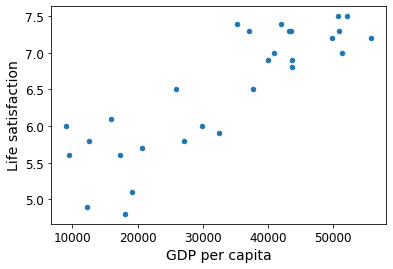

slope, bias:  4.911544589158484e-05 4.853052800266436
Shape of Model Coeff: (1, 1)
Shape of intercept: (1,)
Output Prediction: [[7.06324787]]
shape of X_new: (1, 1)
shape of Y_new: (1, 1)
shape of x_test: (1000,)
shape of y_pred: (1000,)


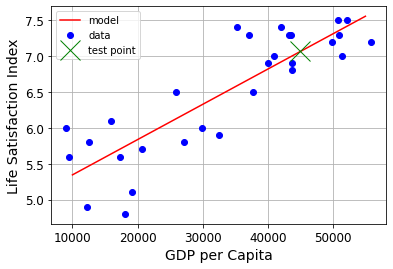

In [ ]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Analyze the dataset
print('Shape of X:', np.shape(X))
print('Shape of y:', np.shape(y))


# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# model parameters: y = m * x + b
m = model.coef_[0][0]  # slope
b = model.intercept_[0] # offset

print('slope, bias: ', m, b)
print('Shape of Model Coeff:', np.shape(model.coef_))
print('Shape of intercept:', np.shape(model.intercept_))

# Make a prediction for Cyprus
#X_new = [[22587]]  # Cyprus' GDP per capita
X_new = [[45000]]
y_new = model.predict(X_new)
print('Output Prediction:', y_new) # outputs [[ 5.96242338]]

print('shape of X_new:', np.shape(X_new))
print('shape of Y_new:', np.shape(y_new))


x_test = np.linspace(10000, 55000, 1000)
y_pred = m * x_test + b   # equation of a line

print('shape of x_test:', np.shape(x_test))
print('shape of y_pred:', np.shape(y_pred))

plt.plot(x, y_pred, 'r-', label='model')
plt.plot(X, y, 'bo', label='data')
plt.plot(X_new, y_new, 'gx', label='test point', markersize=20)
plt.legend(loc='best')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Satisfaction Index')
plt.grid()
plt.show()



### IRIS dataset

- Analyze the dataset
- Select a Model 
- Train the model
- Test / Evaluate the model
- Deploy if happy
- Reiterate above steps if not happy. 


In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print("Target Names: {}".format(iris_dataset['target_names']))
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target']))
print(iris_dataset['DESCR'][:193] + "\n...")


Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Target Names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 nu

In [ ]:
# Prepare Training and Testing Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

print('\nX_train data (first 10 rows):\n',X_train[1:10,:])

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)

X_train data (first 10 rows):
 [[5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01c3394b70>,
      dtype=object)

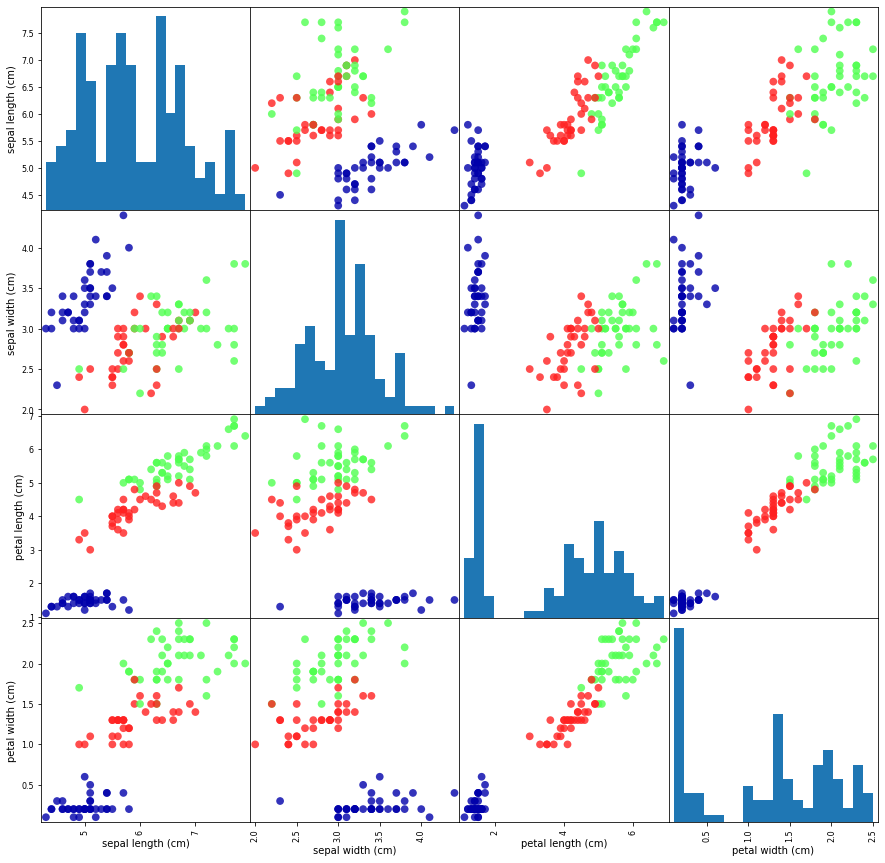

In [ ]:
# Data visualization
# create dataframe from X_train
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create scatter_matrix from dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [ ]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


## K Nearest Neighbor Algorithm

- K-NN Classifier
- KNN regressor

Datasets:

- IRIS data classification
- Breast Cancer Data
- Wave Data

In [ ]:
# IRIS dataset
# Use K-Neighbor classifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# create model
knn = KNeighborsClassifier(n_neighbors=9)

# train the model
knn.fit(X_train, y_train)

# training score
print('Training Accuracy:', knn.score(X_train, y_train))

# Make predictions
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
    iris_dataset['target_names'][prediction]))

# Evaluate the model - Test
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))
print("Test set score1: {:.2f}".format(np.mean(y_pred == y_test)))  # performance of your model.
print("Test set score2: {:.2f}".format(knn.score(X_test, y_test)))

Training Accuracy: 0.9642857142857143
X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score1: 0.97
Test set score2: 0.97


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(X_train[1:10,:])

[[-0.09984503 -1.04039491  0.11355956 -0.02984109]
 [ 1.05300481 -0.11925475  0.95031423  1.12707506]
 [-1.36797986  0.34131533 -1.39259884 -1.31530348]
 [ 1.1682898   0.11103029  0.72717965  1.38416753]
 [-1.0221249   1.03217045 -1.2252479  -0.80111852]
 [-0.56098497  1.49274053 -1.28103155 -1.31530348]
 [-1.0221249  -2.42210516 -0.16535866 -0.28693357]
 [ 0.70714986 -0.11925475  0.95031423  0.74143634]
 [ 0.93771983  0.57160037  1.06188152  1.64126001]]


### Confusion Matrix, classification report

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



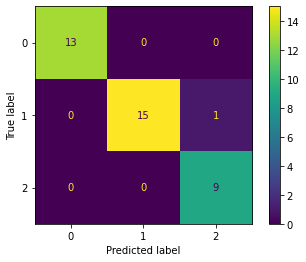

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test)

**Q. Plot the mean prediction error as K varies from 1 to 40?**

Text(0, 0.5, 'Mean Error')

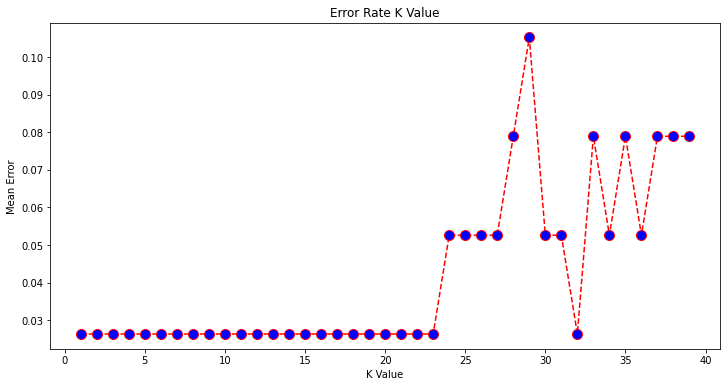

In [ ]:
error = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### 1. K-Nearest Neighbor (K-NN) Classifier

**Example 1.1: Forge Dataset**

* Case 1: k = 1. Each data point is assigned a class label of its nearest neighboring data point.
* Case 2: k = 3. voting is used to decide the class label for the new data. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


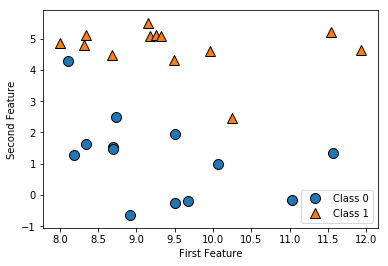

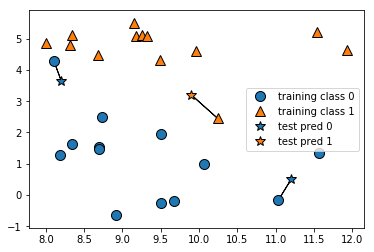

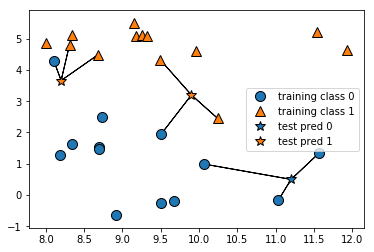

In [ ]:
# Forge Dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
plt.figure(1)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

# Applying k-NN to classify this data
plt.figure(2)
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.figure(3)
mglearn.plots.plot_knn_classification(n_neighbors=3)



__Decision boundary__

* k = 1, the model is more complex and it tries to overfit the training data.
* As k increases, the model generalization capability increases and model becomes simpler. 

Also, here we will see how to use scikit-learn to train a Nearest Neighbor classifier. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


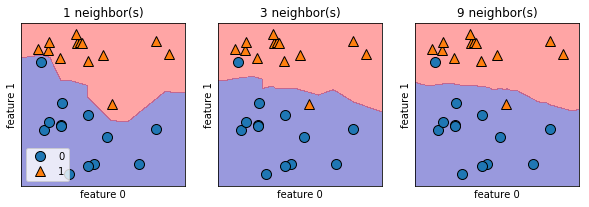

In [ ]:
# k-NN classifier from scikit-learn
# Analyze the decision boundary 

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

# Analyze
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


### Example 1.2:  Breast Cancer dataset

It shows how increasing the number of neighbors improves the generalization. The training accuracy decreases with increasing number of nearest neighbors. However too simple model (k = 10) may lead to underfitting with bad performance with both training and test dataset. The best solution lies somewhere in the middle with k=6 that provides highest test accuracy. 


Shape of cancer data: (569, 30)
cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


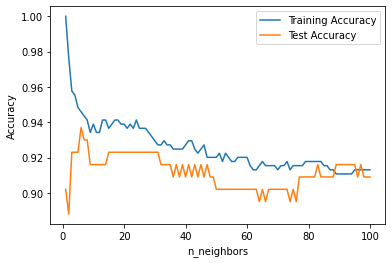

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


# load data
cancer = load_breast_cancer()

# Analyze the data
print("Shape of cancer data: {}".format(cancer.data.shape))
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))
print('Target names:', cancer.target_names)

# Create training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1,101)

for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy 
  test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

### K-Neighbors Regression

### Example 1.3: Wave Dataset

It is a one-dimensional dataset having only one feature with continuous target values. 

for k = 1, test input data takes the target value corresponding to the nearest data point.
for k > 1, test input data takes the target value which is the average of target values for all its k nearest neighbors.

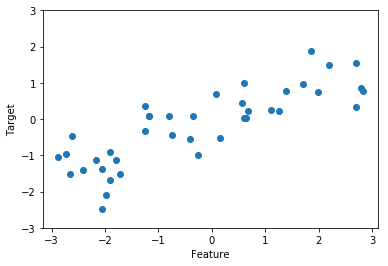

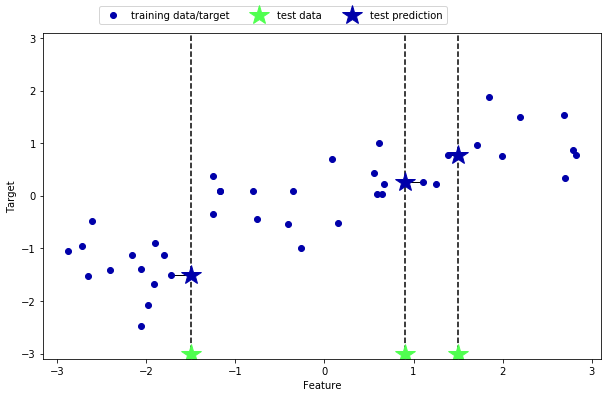

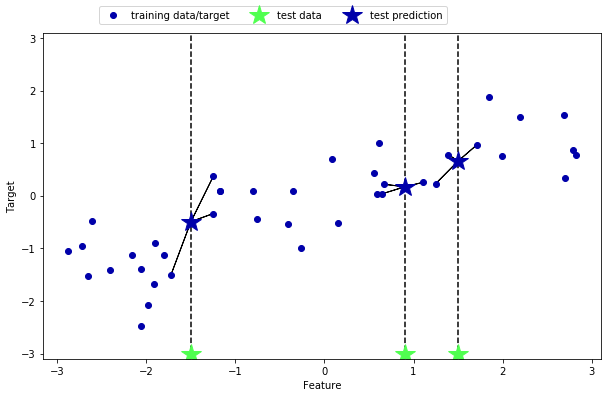

In [ ]:
# Wave dataset
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

# Try knn regression
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)

Shape of X: (40, 1)
Shape of y: (40,)
Shape of X_train: (30, 1)
Shape of y_train: (30,)
Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


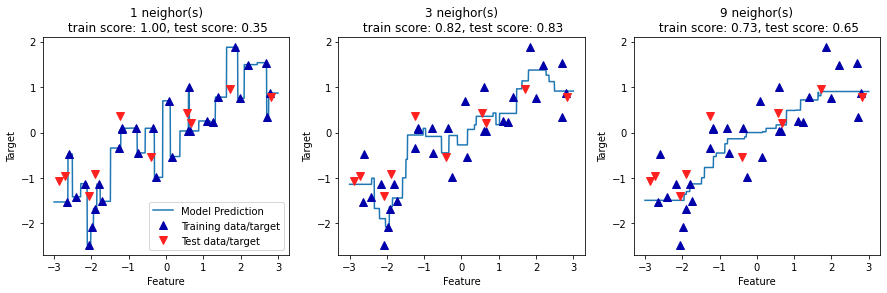

In [ ]:
# Let's try the scikit learn for KNN regression
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

print('Shape of X:', np.shape(X))
print('Shape of y:', np.shape(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Shape of X_train:', np.shape(X_train))
print('Shape of y_train:', np.shape(y_train))

# instantiate the model
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


## Analyzing KNeighborsRegressor
fix, axes = plt.subplots(1, 3, figsize=(15,4))

# create 100 data points evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)  # column vector

for n, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  
  ax.set_title("{} neighor(s)\n train score: {:.2f}, test score: {:.2f}".format(n, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  
axes[0].legend(["Model Prediction", "Training data/target", "Test data/target"], loc="best")

## Linear Models
- Linear Regressors
- Linear Classifiers

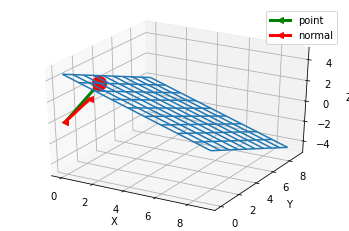

In [ ]:
# Draw a plane 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

line1 = np.array([[0, 0, 0],point])
line2 = np.array([[0, 0, 0], normal])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
#plt3d.plot_surface(xx, yy, z)
plt3d.plot_wireframe(xx, yy, z)
plt3d.scatter3D(point[0], point[1], point[2], c='r', marker ='o', s=200)
plt3d.plot(line1[:,0], line1[:,1], line1[:,2], marker='<', c='g', lw=3, label='point')
plt3d.plot(line2[:,0], line2[:,1], line2[:,2], marker='<', c='r', lw=3, label='normal')
plt3d.set_xlabel('X')
plt3d.set_ylabel('Y')
plt3d.set_zlabel('Z')
plt3d.legend()
plt.show()

### Linear Regressors

w[0]: 0.393906  b: -0.031804


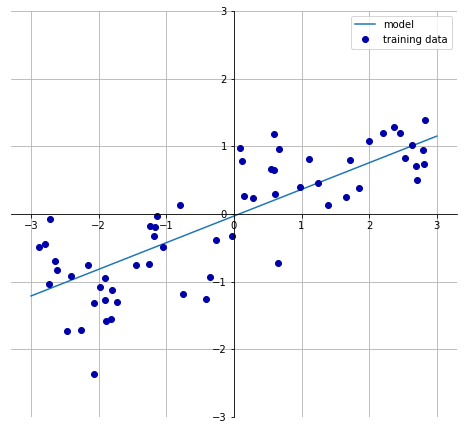

In [ ]:
# Fit a linear model to the wave data
mglearn.plots.plot_linear_regression_wave()


In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=037ddcb73216b6fb9921be1b11999d8a3a1ac38c59d9f1306d3d7311b0709352
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


shape of X: (60, 1)
shape of y: (60,)
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Shape of Coeff_: (1,)
Shape of intercept_: ()
Training set score: 0.67
Test set score: 0.66


Text(0, 0.5, 'y')

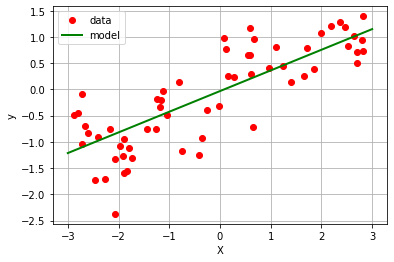

In [ ]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


# Get the dataset
X, y = mglearn.datasets.make_wave(n_samples = 60)

print('shape of X:', np.shape(X))
print('shape of y:', np.shape(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create the model
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))  # weights
print("lr.intercept_: {}".format(lr.intercept_)) # offset / intercept

print('Shape of Coeff_:', np.shape(lr.coef_))
print('Shape of intercept_:', np.shape(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

x_new = np.linspace(-3, 3, 100)
y_new = lr.coef_[0] * x_new + lr.intercept_
plt.plot(X, y, 'ro', label='data')
plt.plot(x_new, y_new, 'g-', lw=2, label='model')
plt.legend(loc='best')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')

#### Another Example

- Generate random input-output 1-D data
- Fit the line model
- Ridge and Lasso regressions

Linear Model: slope: [3.8428968], intercept: [3.06290321]
Ridge Regression: slope=[2.96801937], intercept=[3.93319748]
Lasso Regression: slope=[0.], intercept=[6.75785305]
Elastic Regression: slope=[0.56359506], intercept=[6.22148125]


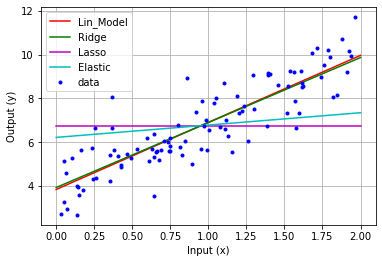

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# input-output data
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)  # Ground truth values

# linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Ridge Regression
ridge = Ridge().fit(x, y)

# Lasso Regression
lasso = Lasso().fit(x, y)

# Elastic Net
elastic = ElasticNet().fit(x, y)


# estimated parameters
b = np.ravel(lin_reg.intercept_)
m = np.ravel(lin_reg.coef_)
print('Linear Model: slope: {}, intercept: {}'.format(b, m))

# plot the line
x_new = np.array([[0], [2]])
y_pred = x_new * m + b
y_pred2 = x_new * np.ravel(ridge.coef_) + np.ravel(ridge.intercept_) 
y_pred3 = x_new * np.ravel(lasso.coef_) + np.ravel(lasso.intercept_) 
y_pred4 = x_new * np.ravel(elastic.coef_) + np.ravel(elastic.intercept_)
print('Ridge Regression: slope={}, intercept={}'.format(
    np.ravel(ridge.coef_), np.ravel(ridge.intercept_)))
print('Lasso Regression: slope={}, intercept={}'.format(
    np.ravel(lasso.coef_), np.ravel(lasso.intercept_)))
print('Elastic Regression: slope={}, intercept={}'.format(
    np.ravel(elastic.coef_), np.ravel(elastic.intercept_)))

plt.plot(x_new, y_pred, 'r-', label='Lin_Model')
plt.plot(x_new, y_pred2, 'g-', label='Ridge')
plt.plot(x_new, y_pred3, 'm-', label='Lasso')
plt.plot(x_new, y_pred4, 'c-', label='Elastic')

plt.plot(x, y, 'b.', label='data')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend(loc='best')
plt.grid()


### Example 2.1: Boston Housing Dataset


* Difference between training and test score indicate that the model is overfitting the data.  Simple linear model overfits the training data
* By using L2 regularization on weight vector, overfitting can be avoided. This is achieved by the Ridge regression model. 
* Alpha denotes the weightage of regularization term on output prediction. In other words, this defines the trade-off between model complexity (small values of weights) and training performance. 
* As the alpha value is increased, the coefficient magnitudes decrease (become smaller) as shown in the plot below.
* Try different values of alpha = 1, 0.1, 10. alpha = 0.1 seems to be best value for the model.


X.shape: (506, 104)
Y.shape: (506,)
Training set score: 0.95
Test set score: 0.61

After Regularization ... 

Training set score: 0.89
Test set score: 0.75
--------------------
size of coeff vector for ridge: (104,)
size of intercept for ridge:()


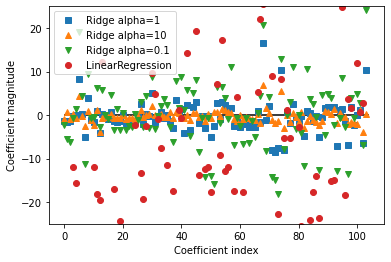

In [ ]:
# Overfitting Model - Ordinary least squares

# get the dataset
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
print('Y.shape:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a linear model
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Ridge Regression with L2 Regularization
from sklearn.linear_model import Ridge

print("\nAfter Regularization ... \n")
ridge = Ridge().fit(X_train, y_train) # alpha = 1
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("--------------------")

ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print("size of coeff vector for ridge: {}".format(np.shape(ridge.coef_)))
print('size of intercept for ridge:{}'.format(np.shape(lr.intercept_)))


# Visualize the model coefficients
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### Linear Models for Classification

- Logistic Regression
- Linear SVC

The code below demonstrates the use of two linear classifiers namely, LinearSVC and LogisticRegression on Forge dataset. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


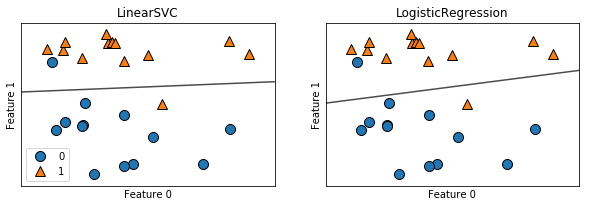

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax = ax, alpha = 0.7)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

### Logistic Regression for IRIS dataset

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
Shape of IRIS data: (150, 4)
Shape of target: (150,)
shape of X (150, 1)


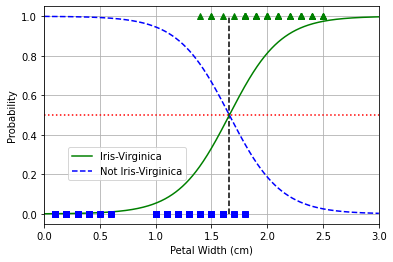

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# load dataset
iris = datasets.load_iris()

print(list(iris.keys()))

print('Shape of IRIS data:', np.shape(iris['data']))
print('Shape of target:', np.shape(iris['target']))

X = iris['data'][:, 3:]  # petal width
y = (iris['target'] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

print('shape of X', np.shape(X))

x1 = X[y==1,:]   # class 1 data
x0 = X[y==0]    # class 0 data



# create & train the model
log_reg = LogisticRegression()
log_reg.fit(X, y)


# prediction
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y1_proba = log_reg.predict_proba(x1)
y0_proba = log_reg.predict_proba(x0)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')
plt.plot(x1, np.ones((len(x1),1)), 'g^')
plt.plot(x0, np.zeros((len(x0),)), 'bs' )
plt.xlim((0,3))
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.hlines(0.5, 0, 3.0, colors='r', linestyle='dotted')
plt.vlines(1.66, 0.0, 1.0, colors='k', linestyle='dashed')
plt.grid()
plt.legend(loc=(0.07, 0.2))
plt.show()

### Softmax Regression
- Multi-class classification using logistic regression
- IRIS dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# load dataset
iris = datasets.load_iris()

print(list(iris.keys()))
print('target names:', iris['target_names'])

# prepare datasets
X = iris['data']
y = iris['target']

print(np.shape(X))
print(np.shape(y))

# scale the features
scaler = StandardScaler()
scaler.fit(X, y)
X = scaler.transform(X)

# create and train the model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1e5)
softmax_reg.fit(X, y)
print('Training Accuracy:', softmax_reg.score(X, y))

# predict the class
X_new = np.array([[5, 2.9, 1, 0.2],
                  [3, 1.5, 2.4, 0.7]])
print('Predicted classes:', softmax_reg.predict(X_new))

prob = softmax_reg.predict_proba(X_new)
print(prob)

coef = softmax_reg.coef_
intercept = softmax_reg.intercept_
print('Shape of Coefficients:', np.shape(coef))
print('Shape of Intercepts:', np.shape(intercept))


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
target names: ['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)
Training Accuracy: 0.9866666666666667
Predicted classes: [1 2]
[[1.21876933e-21 9.99999996e-01 4.10097462e-09]
 [2.70670958e-32 5.79283185e-09 9.99999994e-01]]
Shape of Coefficients: (3, 4)
Shape of Intercepts: (3,)


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
target names: ['setosa' 'versicolor' 'virginica']
(150, 2)
(150,)
Predicted label:  ['virginica']
Prediction Probability:  [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


Text(0, 0.5, 'Petal Width')

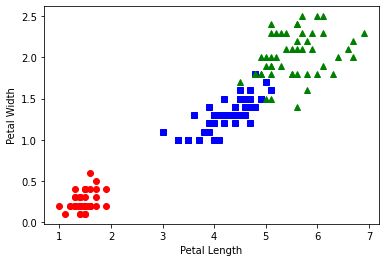

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# load dataset
iris = datasets.load_iris()

print(list(iris.keys()))
print('target names:', iris['target_names'])

# prepare datasets
X = iris['data'][:,(2,3)]
y = iris['target']

print(np.shape(X))
print(np.shape(y))

x0 = X[y==0, :]
x1 = X[y==1, :]
x2 = X[y==2, :]
# create model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

#p = softmax_reg.predict_proba(X)

# predict
pred_label = softmax_reg.predict([[5, 2]])
print('Predicted label: ', iris['target_names'][pred_label])
print('Prediction Probability: ', softmax_reg.predict_proba([[5, 2]]))

plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1],'bs')
plt.plot(x2[:,0], x2[:,1], 'g^')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')




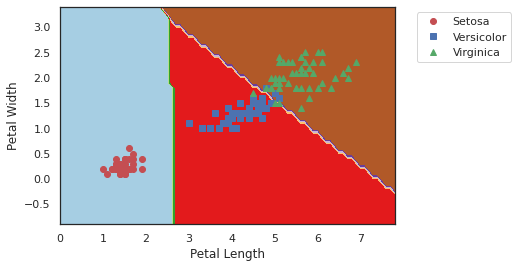

In [ ]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = softmax_reg.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

plt.plot(x0[:,0], x0[:,1], 'ro', label='Setosa')
plt.plot(x1[:,0], x1[:,1],'bs', label='Versicolor')
plt.plot(x2[:,0], x2[:,1], 'g^', label='Virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

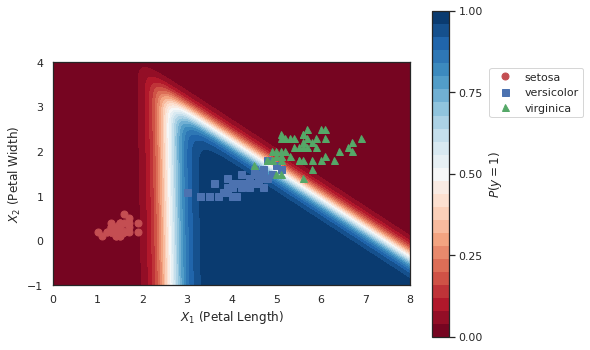

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
xx, yy = np.mgrid[0:8:.01, -1:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = softmax_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)
ax.plot(x0[:,0], x0[:,1], 'ro', label='Setosa', markersize=7)
ax.plot(x1[:,0], x1[:,1],'bs', label='Versicolor', markersize=7)
ax.plot(x2[:,0], x2[:,1], 'g^', label='Virginica', markersize=7)

ax.set(aspect="equal",
       xlim=(0, 8), ylim=(-1, 4),
       xlabel="$X_1$ (Petal Length)", ylabel="$X_2$ (Petal Width)")
ax.legend(iris['target_names'], bbox_to_anchor=(1.5,1))

### Linear models for multiclass classification

* binary classification is applied to multi-class classification by using one-vs-rest approach
* In other words there will be one binary classifier per class.  So each classifier will have its own set of coefficients (W) and intercept (b)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


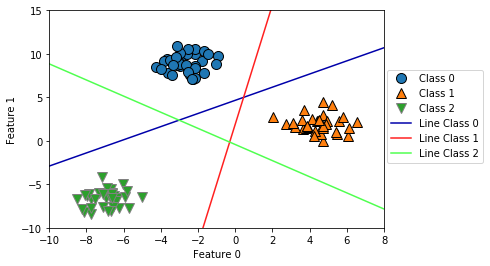

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# plt.legend(["Class 0", "Class 1", "Class 2"])

# train a LinearSVC 
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)


line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept)/coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.legend(["Class 0", "Class 1", "Class 2", "Line Class 0", "Line Class 1", 
            "Line Class 2"], loc = (1.01, 0.3))


### Polynomial Regression

Shape of X_poly (100, 2)
Intercepts:[1.89744905], Coefficients:[[1.00488191 0.56760938]]


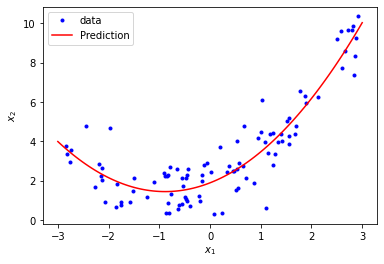

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, 
                                   include_bias=False)
X_poly = poly_features.fit_transform(X)

print('Shape of X_poly', np.shape(X_poly))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('Intercepts:{}, Coefficients:{}'\
              .format(lin_reg.intercept_, lin_reg.coef_))

X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.', label='data')
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')


#### Linear SVC for IRIS Data

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)
# svm_clf = LinearSVC(C=1).fit(X,y)

# create model
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

# train
svm_clf.fit(X, y)

# predict
svm_clf.predict([[5.5, 1.7]])

array([1.])

Coefficient shape:  (1, 2)
Intercept shape:  (1,)


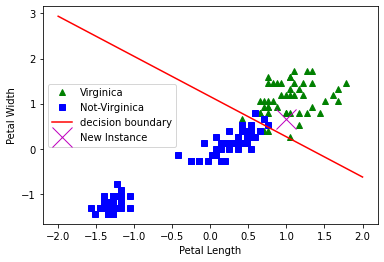

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# load dataset
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

# scale in the features
scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)

# create the model
svm_clf = LinearSVC(C=1)

# train the model
svm_clf.fit(Xs, y)

print("Coefficient shape: ", svm_clf.coef_.shape)
print("Intercept shape: ", svm_clf.intercept_.shape)

# test data
test_data = [[5.5, 1.7]]
ts = scaler.transform(test_data)

# predict class for test data
svm_clf.predict(ts)

line = np.linspace(-2.0, 2.0)

plt.plot(Xs[:,0][y==1], Xs[:,1][y==1], 'g^', label='Virginica')
plt.plot(Xs[:,0][y==0], Xs[:,1][y==0], 'bs', label='Not-Virginica')
plt.plot(line, -(line * svm_clf.coef_[0][0] + 
                 svm_clf.intercept_[0])/svm_clf.coef_[0][1], 
         'r-', label='decision boundary')
plt.plot(ts[:,0], ts[:,1],'mx', markersize=20, label='New Instance')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='best')
plt.show()


Coefficient shape:  (3, 2)
Intercept shape:  (3,)
Training Accuracy: 0.9533333333333334


Text(0, 0.5, 'Petal Width')

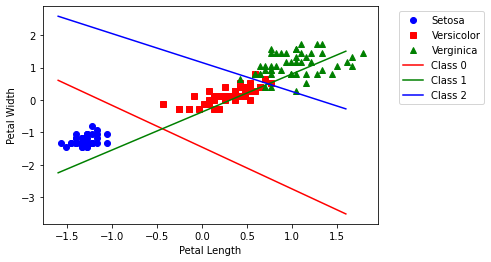

In [ ]:
# Exercise Problem
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# load dataset
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"]).astype(np.float64) # Iris-Virginica

# scale in the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# create the model
svm_clf = LinearSVC(C=1)

# train the model
svm_clf.fit(X, y)

print("Coefficient shape: ", svm_clf.coef_.shape)
print("Intercept shape: ", svm_clf.intercept_.shape)
print('Training Accuracy:', svm_clf.score(X,y))

line = np.linspace(-1.6, 1.6, 100)

y1 = -(line * svm_clf.coef_[0][0] + 
                 svm_clf.intercept_[0])/svm_clf.coef_[0][1]
y2 = -(line * svm_clf.coef_[1][0] + 
                 svm_clf.intercept_[1])/svm_clf.coef_[1][1]
y3 = -(line * svm_clf.coef_[2][0] + 
                 svm_clf.intercept_[2])/svm_clf.coef_[2][1]

# plot
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo', label='Setosa')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'rs', label='Versicolor')
plt.plot(X[:,0][y==2], X[:,1][y==2], 'g^', label='Verginica')
plt.plot(line, y1, 'r-', label='Class 0')
plt.plot(line, y2, 'g-', label='Class 1')
plt.plot(line, y3, 'b-', label='Class 2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')



## Support Vector Machines
- Binary classifier: Linear SVC
- Nonlinear classifier: SVC with kernel
- Regression using SVM
- Datasets:
  - Make moons
  - Digits dataset
  - Breast Cancer dataset

### Apply SVM to make moons dataset

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# create dataset
X, y = make_moons(n_samples=100, noise=0.15, 
                  random_state=42)

print(np.shape(X))
print(np.shape(y))

# create model
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", 
                              random_state=42))
    ])

# train the model
polynomial_svm_clf.fit(X, y)

test_point = [[1.5, 0.5]]  # shape(1, 2)
y_test = polynomial_svm_clf.predict(test_point)
print(y_test)

(100, 2)
(100,)
[0]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Shape of mesh grid data (10000, 2)


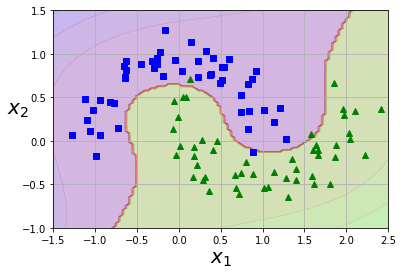

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    print('Shape of mesh grid data', np.shape(X))
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#plt.savefig("moons_polynomial_svc_plot")
plt.show()

### Kernelized SVM



#### SVM with Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", 
          degree=5, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)
print('Accuracy:', poly_kernel_svm_clf.score(X,y))

Accuracy: 0.99


In [ ]:
from sklearn.model_selection import train_test_split

# download dataset
X, y = make_moons(n_samples=100, noise=0.15, 
                  random_state=42)

print(np.shape(X))
print(np.shape(y))

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

# create the model
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", 
          degree=3, coef0=1, C=1))
])

# train the model
poly_kernel_svm_clf.fit(X_train, y_train)

print('Training Accuracy:', poly_kernel_svm_clf.score(X_train, y_train))
print('Test Accuracy:', poly_kernel_svm_clf.score(X_test,y_test))

(100, 2)
(100,)
(75, 2)
(75,)
(25, 2)
(25,)
Training Accuracy: 0.9333333333333333
Test Accuracy: 0.96


In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", 
                degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

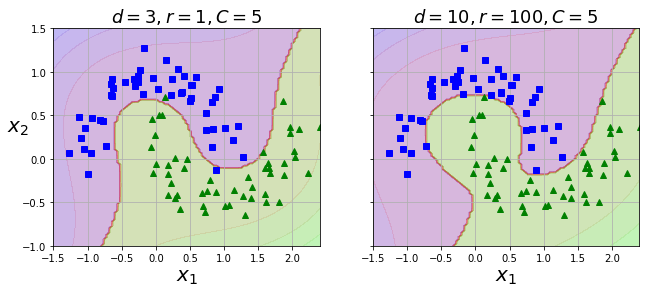

In [ ]:

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.savefig("moons_kernelized_polynomial_svc_plot")
plt.show()

#### SVM with Gaussian Kernel

Shape of mesh grid data (10000, 2)


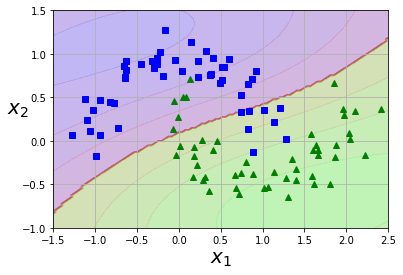

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))  #vary gamma & C
])
rbf_kernel_svm_clf.fit(X, y)


plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

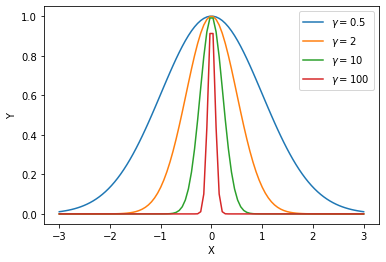

In [ ]:
import math
x = np.linspace(-3,3,100)
gamma = 0.5
y = np.exp(-gamma * x * x)
y1 = np.exp(-2*x*x)
y3 = np.exp(-10*x*x)
y4 = np.exp(-100*x*x)

plt.plot(x, y, label='$\gamma=0.5$')
plt.plot(x,y1, label='$\gamma=2$')
plt.plot(x,y3, label='$\gamma=10$')
plt.plot(x, y4, label='$\gamma=100$')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

### SVM Regression

In [ ]:
from sklearn.svm import LinearSVR
import numpy as np

# create dataset
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

print(np.shape(X))
print(np.shape(y))

# create model
svm_reg = LinearSVR(epsilon=1.5, random_state=42)

# train model
svm_reg.fit(X, y)

print('Training ', svm_reg.score(X,y))

(50, 1)
(50,)
Training Accuracy 0.705128031944236


In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)



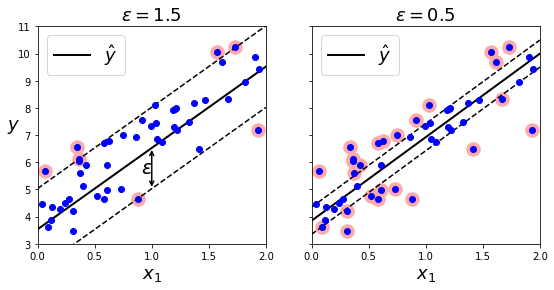

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

### Nonlinear SVM Regression

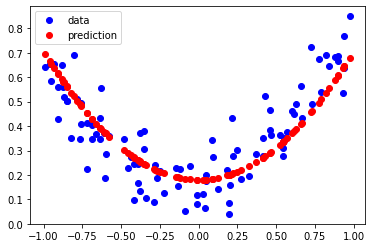

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# create dataset
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# create model
svm_poly_reg = SVR(kernel="poly", 
                   degree=2, C=1000, epsilon=0.01, gamma="scale")

# train model
svm_poly_reg.fit(X, y)

y_test = svm_poly_reg.predict(X)

plt.plot(X[:,0], y, 'bo', label='data')
plt.plot(X[:,0], y_test, 'ro', label='prediction')
plt.legend(loc='best')


In [ ]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

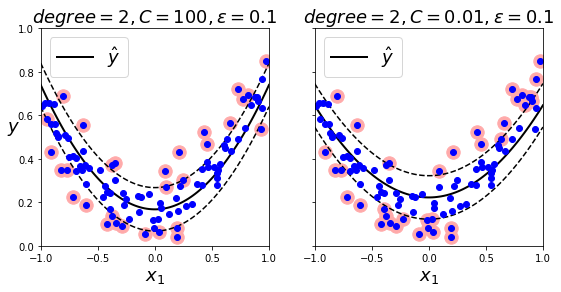

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

### Apply SVM to Digit dataset

- `array[:-1]` means all data except the last row or element
- Input is an 8x8 image and output is one of the 10 labels, 0, 1, ..., 9

Shape of data: (1797, 64)
shape of target: (1797,)
Target Labels: [0 1 2 ... 8 9 8]
Image size of data (1797, 8, 8)
Accuracy of the model on the training set: 1.0
Prediction for last row in data: [8]
Actual target for last row in data: [8]


(-0.5, 7.5, 7.5, -0.5)

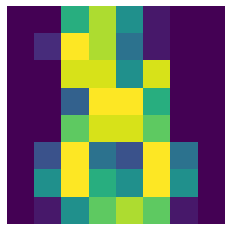

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# load the dataset
digits = datasets.load_digits()

print('Shape of data:',np.shape(digits.data))
print('shape of target:', np.shape(digits.target))
print('Target Labels:', digits.target)
print('Image size of data', np.shape(digits.images))

# create the SVM model
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(digits.data[:-1], digits.target[:-1])
print('Accuracy of the model on the training set:', clf.score(digits.data, digits.target))

# predict
print('Prediction for last row in data:', clf.predict(digits.data[-1:]))
print('Actual target for last row in data:', digits.target[-1:])

plt.figure(1)
plt.imshow(digits.images[-1,:,:])
plt.axis('off')

### SVM - Projecting data to higher dimension 

Few observations:

* the data is not linearly separable in a 2 dimensional plane. 
* In 3D, it is linearly separable by a plane. 
* this plane when projected to 2D space, it becomes an ellipse 

The basic idea is to project data to a higher dimensional space where it will be linearly separable.  This is done by using kernels.

There are two ways to map input data into a higher dimensional space:
* Adding an additional feature dimension
* Kernel trick: Radial Basis Functions (RBF) - gaussian kernel

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

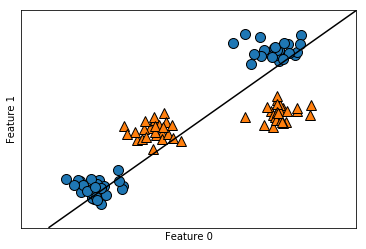

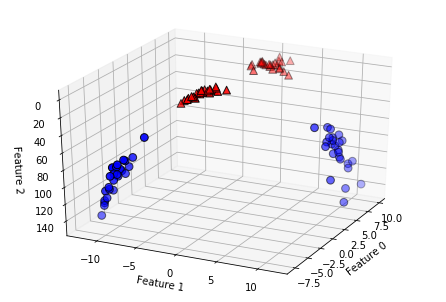

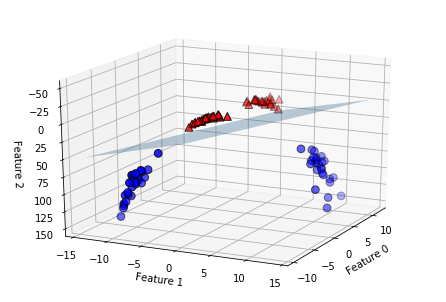

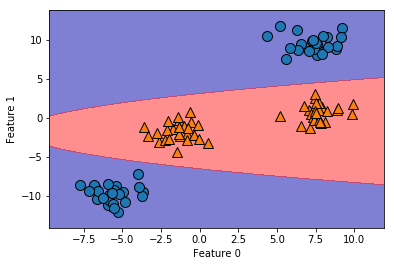

In [ ]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D, axes3d

X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)

# Add another feature 
X_new = np.hstack([X, X[:,1:]**2])

# visualize this extended 3D data
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
          marker ='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")

# Apply SVM in 3D
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -160, azim = -26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)

# plane: AX + BY + CZ = 0
ZZ = (coef[0]*XX + coef[1]*YY + intercept) / (-coef[2])  
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
          marker ='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")

# draw a contour plot for the SVM decision boundary

figure = plt.figure()
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


__Support Vectors and Decision boundaries__

_Support vectors_ are data points that lie on the border between the clases. 

Gaussian / RBF Kernel: $k_{rbf} = exp(-\gamma\|x_1-x_2\|^2)$

There are two parameters to adjust: the $C$ parameter and the `gamma` parameter. 

* `gamma` refers to the inverse of the width of the Gaussian Kernel.
* `gamma` determines how far the influence of each data point reaches.  Low value corresponds to a far reach and high values to a limited reach. 
*  The $C$ parameter is a regularization parameter. It limits the importance of each  point (or their corresponding coefficients)


Let us analyze the effect of tuning these parameters. See the second array of figures below: 

* `gamma` value is increased from 0.1 to 10 from left to right. A small `gamma` means large radius for the Gaussian Kernel affecting a large number of neighboring data points. This is reflected in smooth decision boundries. Large `gamma` values means smaller radius for Gaussian kernel and hence the decision boundary responds to each point and hence more discontinuous.  
* Low `gamma` value means simpler model with smooth decision boundaries. High values lead more complex model with abrupt or discontinuous decision boundaries. 
* the $C$ parameter increases from 0.1 to 1000 from top to bottom. 
* Smaller $C$ values means a very restricted model where each data point can only have very limited influence. Large values correspond to a model with no restriction leading to overfitting. The decision boundary responds to each data point. 




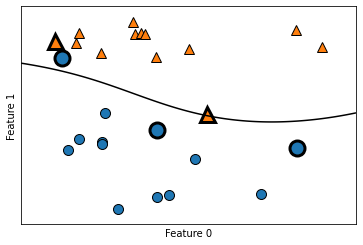

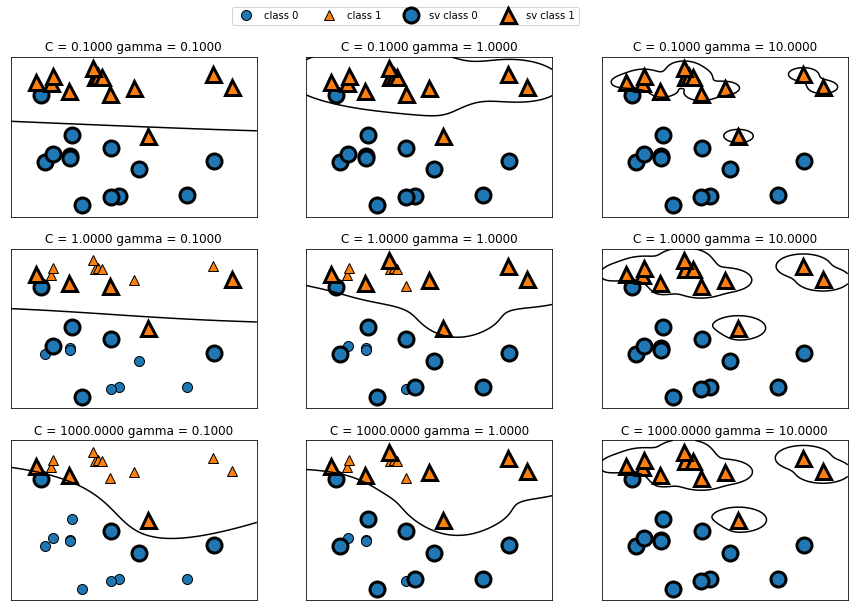

In [ ]:
from sklearn.svm import SVC
import mglearn
# support vectors and decision boundary
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


# tuning the SVM parameters

fig, axes = plt.subplots(3,3, figsize =(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip (ax, range(-1,2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax = a)
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], 
                ncol=4, loc=(0.9,1.2))

### Apply SVM to the Breast Cancer Data set

* Default model SVC overfits the data producing a score 1 for training data and only 0.6 for test dataset.
* On analyzing magnitude of features, it is realized that the different features have diffierent orders of magnitude.  
* SVMs are sensitive to data scaling and parameter tuning.




In [ ]:
# Try SVM classification to Breast Cancer Data
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC(kernel='rbf', C=100, gamma=0.01)
svc.fit(X_train, y_train)
print("\nSVM parameters on original data with default parameters\n")
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(svc.score(X_test, y_test)))


# # Analyze the dataset
# plt.boxplot(X_train, manage_xticks=False)
# plt.yscale("symlog")
# plt.xlabel("Feature index")
# plt.ylabel("Feature magnitude")

# Pre-process the input data
# rescale the data points between 0 & 1

min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

# use THE SAME transformation on the test set,
# using min and range of the training set 
X_test_scaled = (X_test - min_on_training) / range_on_training

print ("\nSVM performance after data rescaling\n")
# train SVM on transformed dataset
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

print("\nSVM performance after parameter turning on transformed data \n")
# Now tune the SVC parameters
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svc.score(X_test_scaled, y_test)))


SVM parameters on original data with default parameters

Accuracy on training set: 1.00
Accuracy on test set: 0.62

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

SVM performance after data rescaling

Accuracy on training set: 0.984
Accuracy on test set: 0.972

SVM performance after parameter turning on transformed data 

Accuracy on training set: 1.000
Accuracy on test set: 0.958



## Naive Bayes Classifier

In [ ]:
# Naive Bayes Classifier
from sklearn import metrics 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 

# load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

classifier = GaussianNB()
model = classifier.fit(X_train, y_train)
print("Training score: {}".format(model.score(X_train, y_train)))
print("Test Score: {}".format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", 
      metrics.accuracy_score(y_test, y_pred)*100)



Training score: 0.9555555555555556
Test Score: 0.95
Gaussian Naive Bayes model accuracy(in %): 95.0


In [ ]:
# Assigning features and label variables
outlook = ['Rainy', 'Rainy','Overcast','Sunny','Sunny', 'Sunny', 'Overcast', 
           'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild',
        'Mild','Mild','Hot','Mild']
humidity = ['high', 'high', 'high', 'high', 'normal','normal', 'normal', 'high',
            'normal', 'normal', 'normal', 'high', 'normal', 'high']
windy = ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'yes']
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes',
        'Yes','Yes','No']

# import label encoder
from sklearn import preprocessing

# creating an instance of label encoder
le = preprocessing.LabelEncoder()
outlook_enc = le.fit_transform(weather)
print("outlook: ", outlook_enc)

temp_enc = le.fit_transform(temp)
print("Temperature: ", temp_enc)

humidity_enc = le.fit_transform(humidity)
print("Humidity: ", humidity_enc)

wind_enc = le.fit_transform(windy)
print("Wind: ", wind_enc)

labels = le.fit_transform(play)
print("Play: ", labels)


features = zip(weather_enc, temp_enc, humidity_enc, wind_enc)
features = list(features)
print("Features:", features)

#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#model = BernoulliNB()
model = MultinomialNB()
model.fit(features, labels)

# #today = ['Sunny', 'hot', 'normal','no']
today = [[3, 1, 1, 0 ]]
predicted = model.predict(today)
print("Predicted output:", predicted)

outlook:  [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temperature:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity:  [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind:  [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Features: [(2, 1, 0, 0), (2, 1, 0, 1), (0, 1, 0, 0), (1, 2, 0, 0), (1, 0, 1, 0), (1, 0, 1, 1), (0, 0, 1, 1), (2, 2, 0, 0), (2, 0, 1, 0), (1, 2, 1, 0), (2, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (1, 2, 0, 1)]
Predicted output: [1]


## Decision Trees

- Classification
- Regression

### Apply DT to IRIS Dataset

In [ ]:
# predict
x_test = [[1, 1.5]]
y_pred = tree_clf.predict(x_test)
print('Predicted class for input [1, 1.5]:',y_pred)
print('Prediction Probability:', tree_clf.predict_proba(x_test))

Predicted class for input [1, 1.5]: [0]
Prediction Probability: [[1. 0. 0.]]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

# train
tree_clf = DecisionTreeClassifier(max_depth=2) 
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

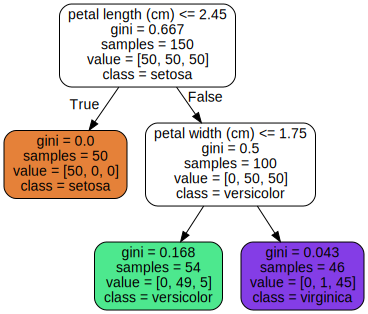

In [ ]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

image_path = './'
export_graphviz(
tree_clf,
out_file=os.path.join(image_path, "iris_tree.dot"),
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)
Source.from_file(os.path.join(image_path, "iris_tree.dot"))

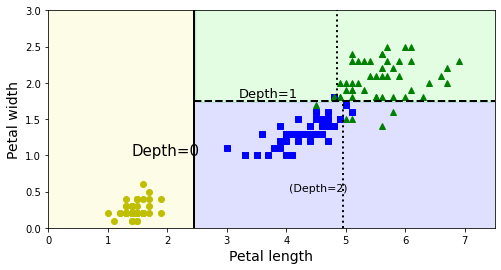

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


plt.show()

### Regularization Parameters for Decision Trees

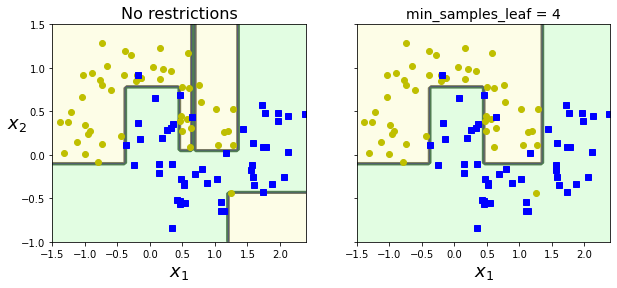

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

### Apply DT to Breast Cancer Dataset

- Decision Tree for classification.
- Feature Importance
- Regularization is achieved by restricting the way the tree is formed.  



Accuracy on training set: 1.000
Accuracy on test set: 0.937
After restricting depth ...
Accuracy on training set: 0.988
Accuracy on test set: 0.951


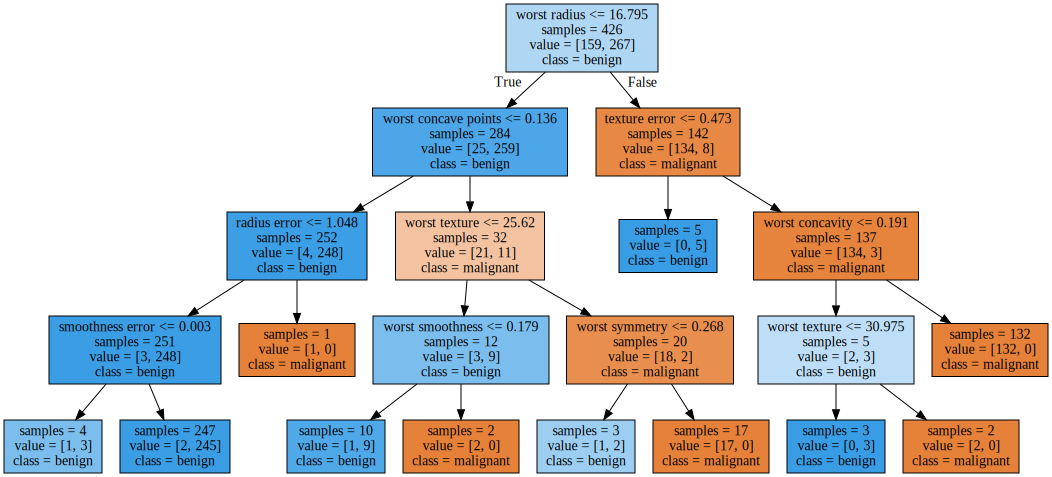

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


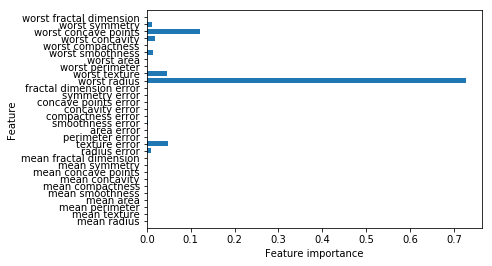

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# load dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# create and train model
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

print("After restricting depth ...")
# restrict the depth of decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



# Visualizing the tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names = ["malignant", "benign"],
               feature_names = cancer.feature_names, 
                impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Feature importance in trees
print("Feature importances:\n{}".format(tree.feature_importances_))



def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)


plot_feature_importances_cancer(tree)

### Decision tree Regression

- The tree has no ability to generate new responses, outside of what was seen in the training.



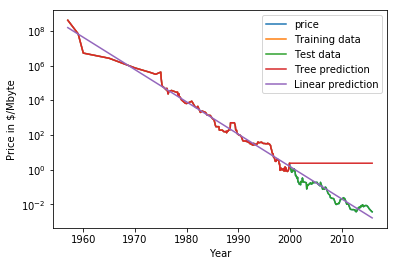

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

# train models
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict all data
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# plot
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#print("Shape of ram_prices.date:", np.shape(ram_prices.date))
#print("Shape of X_all:", np.shape(X_all))
#print("shape of data_train: ", np.shape(data_train))
#print("shape of X_train: ", np.shape(X_train))


#### Regression on a Quadratic Dataset

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Create & Train the model
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

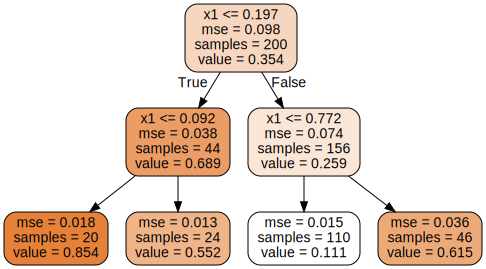

In [ ]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz
IMAGES_PATH = './'

export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

In [ ]:
# predict values for new input
x1 = [[0.6]]
tree_reg.predict(x1)

array([0.11063973])

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

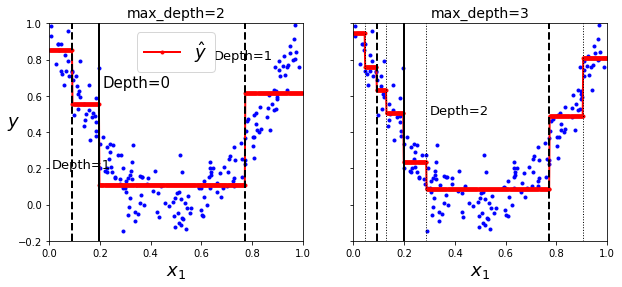

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

__Regularizing a decision tree regressor__

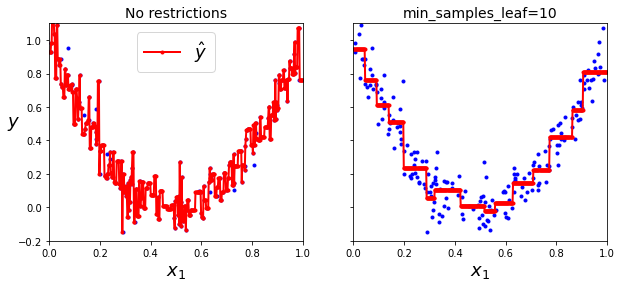

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### Random Forests



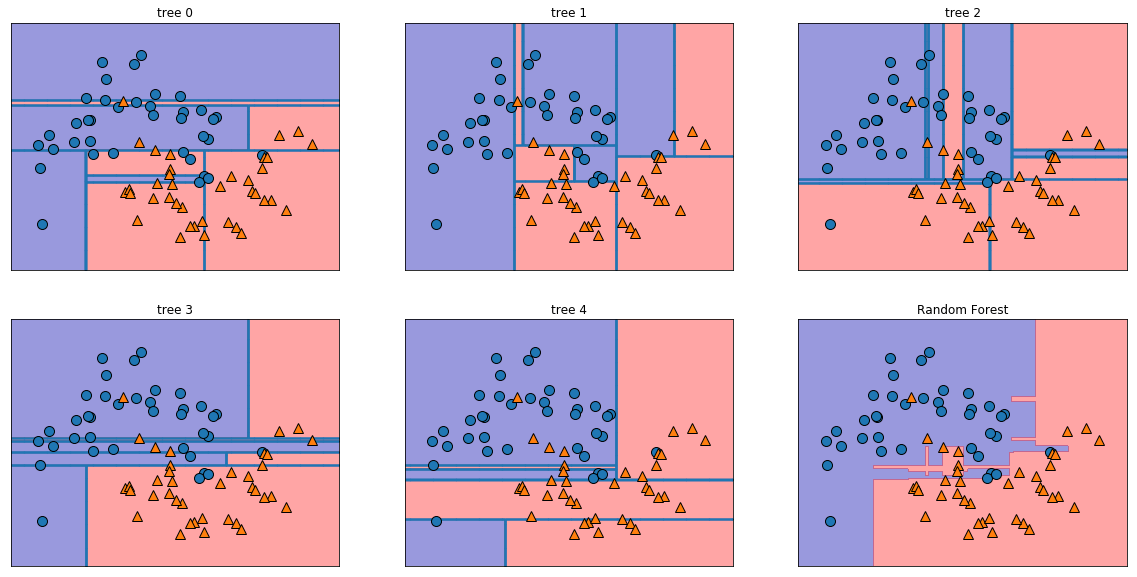

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)


# Visualize the decision boundaries learned by each tree
fig, axes = plt.subplots(2, 3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax=axes[-1, -1],
                               alpha = 0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Accuracy on training set: 1.000
Accuracy on test set: 0.972


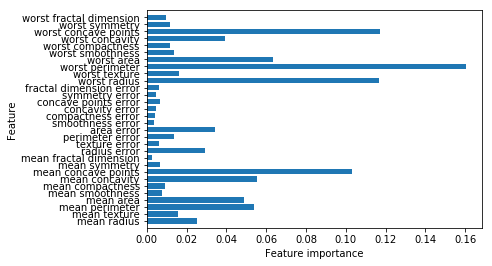

In [ ]:
# Apply random forest to breast cancer data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# this function is defined above. Please execute that block first.
plot_feature_importances_cancer(forest)

## Unsupervised Learning Algorithms


### Data preprocessing / scaling

- Standard Scaler
- MinMax Scaler
- Robust Scaler
- Normalizer


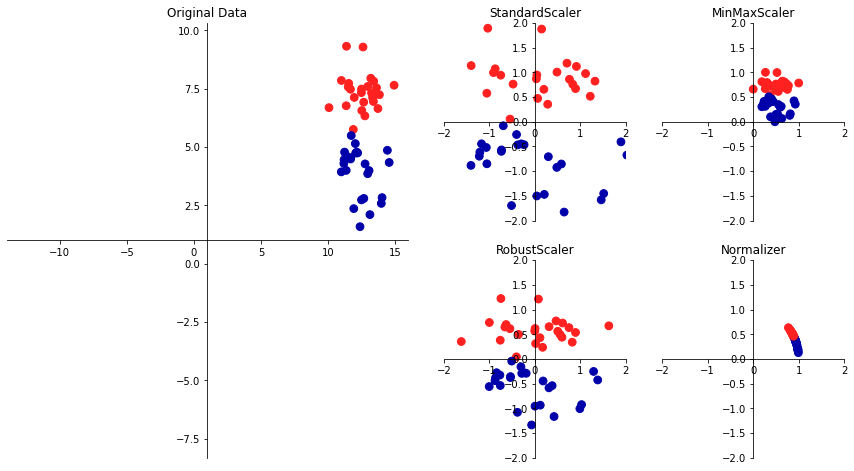

In [ ]:
import mglearn
mglearn.plots.plot_scaling()

#### Breast Cancer Dataset

- Apply MinMaxScaler
- Analyze the effect of scaling
- SVM provides higher accuracy for scaled dataset.

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Breast Cancer Dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,random_state=1)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # computes max and min value of each feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

np.set_printoptions(formatter={'float': lambda x: "{0:4.2f}".format(x)})
#np.set_printoptions(precision=3)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))


Training data size: (426, 30)
Test data size: (143, 30)
transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.98 9.71 43.79 143.50 0.05 0.02 0.00 0.00 0.11 0.05 0.12 0.36 0.76 6.80
 0.00 0.00 0.00 0.00 0.01 0.00 7.93 12.02 50.41 185.20 0.07 0.03 0.00 0.00
 0.16 0.06]
per-feature maximum before scaling:
 [28.11 39.28 188.50 2501.00 0.16 0.29 0.43 0.20 0.30 0.10 2.87 4.88 21.98
 542.20 0.03 0.14 0.40 0.05 0.06 0.03 36.04 49.54 251.20 4254.00 0.22 0.94
 1.17 0.29 0.58 0.15]
per-feature minimum after scaling:
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00]
per-feature maximum after scaling:
 [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00]


In [ ]:
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[0.03 0.02 0.03 0.01 0.14 0.04 0.00 0.00 0.15 -0.01 -0.00 0.01 0.00 0.00
 0.04 0.01 0.00 0.00 -0.03 0.01 0.03 0.06 0.02 0.01 0.11 0.03 0.00 0.00
 -0.00 -0.00]
per-feature maximum after scaling:
[0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.50 0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.90 0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


In [ ]:
from sklearn.svm import SVC

svm = SVC(C=100)
svm.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

print ("\nSVM Performance:")

print("Test Set Accuracy: {:.2f}".format(svm.score(X_test, y_test)))
print("Scaled test set Accuracy: {:.2f}\n".format(svm.score(X_test_scaled, y_test)))


SVM Performance:
Test Set Accuracy: 0.38
Scaled test set Accuracy: 0.97



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

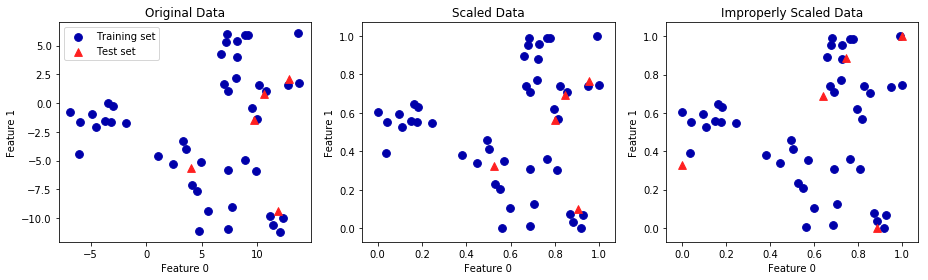

In [ ]:
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
fig.tight_layout()

## Principal Component Analysis (PCA)

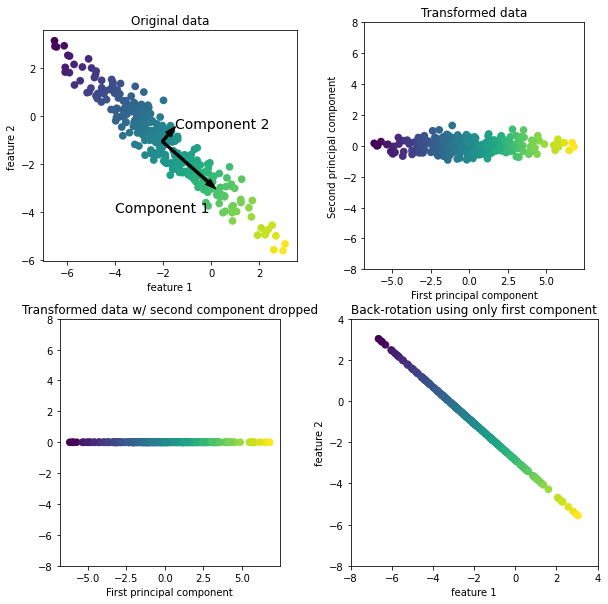

In [ ]:
import mglearn
mglearn.plots.plot_pca_illustration()

#### PCA for visualizing Breast Cancer data

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Breast Cancer Dataset
cancer = load_breast_cancer()
#print(cancer.DESCR)
print('Data shape:', np.shape(cancer.data))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

Data shape: (569, 30)


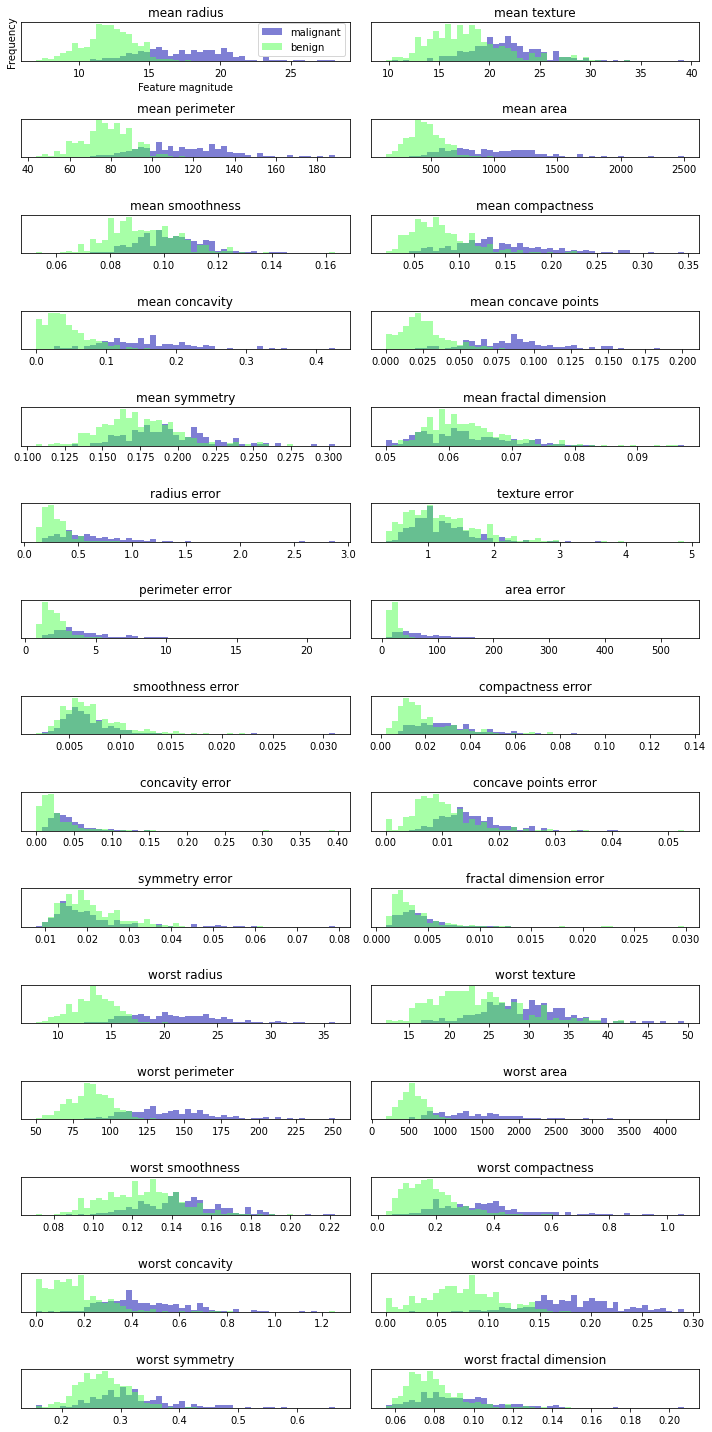

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(15, 2, figsize=(10, 20))

ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
  ax[0].set_xlabel("Feature magnitude")
  ax[0].set_ylabel("Frequency")
  ax[0].legend(["malignant", "benign"], loc="best")
  fig.tight_layout()


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

X1 = X_pca[cancer.target==0,:]    # malignant
X2 = X_pca[cancer.target==1,:]    # benign

print('Cancer Target Names:', cancer.target_names)



Original shape: (569, 30)
Reduced shape: (569, 2)
Cancer Target Names: ['malignant' 'benign']


Text(0, 0.5, 'Second principal component')

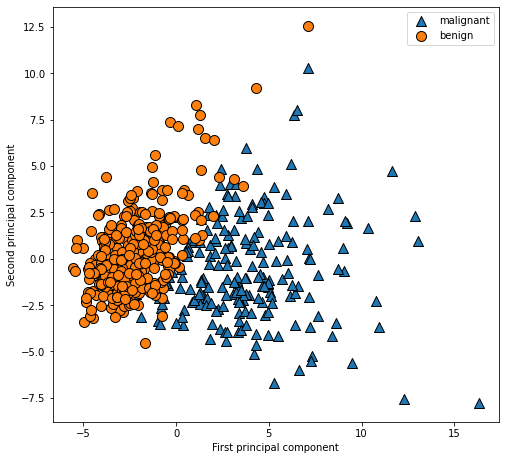

In [ ]:
import matplotlib.pyplot as plt
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X1[:,0], X1[:,1], marker='^', s=100, edgecolor='black')
plt.scatter(X2[:,0], X2[:,1], marker='o', s=100, edgecolor='black')
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

PCA Component Shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

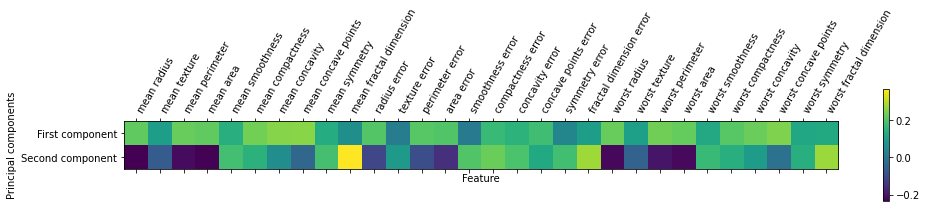

In [ ]:
# understanding PCA
print("PCA Component Shape:", pca.components_.shape)
print("PCA components:\n{}".format(pca.components_))

# heatmap
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

shape of pca: (150, 2)


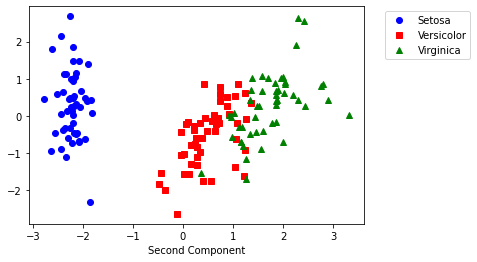

In [ ]:
# Exercise 1.4.3
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


iris_dataset = load_iris()

scaler = StandardScaler().fit(iris_dataset['data'])

X_scaled = scaler.transform(iris_dataset['data'])

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('shape of pca:', np.shape(X_pca))

X1 = X_pca[iris_dataset['target']==0,:]
X2 = X_pca[iris_dataset['target']==1,:]
X3 = X_pca[iris_dataset['target']==2,:]

plt.plot(X1[:,0], X1[:,1], 'bo', label='Setosa')
plt.plot(X2[:,0], X2[:,1], 'rs', label='Versicolor')
plt.plot(X3[:,0], X3[:,1], 'g^', label='Virginica')
plt.xlabel('First component')
plt.xlabel('Second Component')
plt.legend(bbox_to_anchor=(1.05,1))


PCA Component Shape: (2, 4)
PCA components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


Text(0, 0.5, 'Principal components')

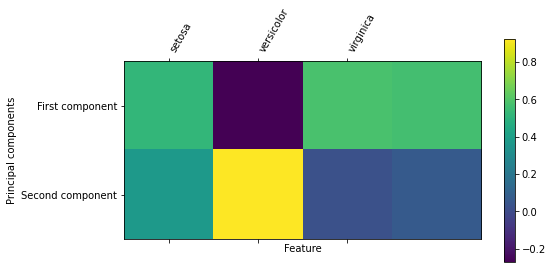

In [ ]:
# understanding PCA
print("PCA Component Shape:", pca.components_.shape)
print("PCA components:\n{}".format(pca.components_))

# heatmap
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris_dataset['target_names'])),
iris_dataset['target_names'], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

No handles with labels found to put in legend.


Cluster Centres: [[ 0.57262144 -0.80720888]
 [-2.22475316  0.28892745]
 [ 1.72103664  0.60288719]]
Cluster Centres: [[ 1.11237658 -0.14446373]
 [-2.22475316  0.28892745]]


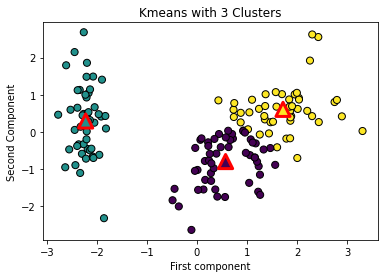

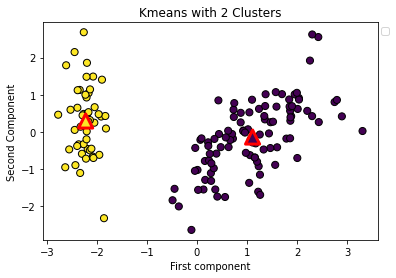

In [ ]:
# Exercise 1.4.4
from sklearn.cluster import KMeans

y = iris_dataset['target']

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

plt.figure(1)
assignments = kmeans.labels_
print('Cluster Centres:', kmeans.cluster_centers_)
plt.scatter(X_pca[:,0], X_pca[:,1], c=assignments.astype(float), 
            edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c=[0,1,2], marker='^', s=200, edgecolor='r', linewidth=3)
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.title('Kmeans with 3 Clusters')


kmeans=KMeans(n_clusters=2).fit(X_pca)
labels = kmeans.labels_ 
print('Cluster Centres:', kmeans.cluster_centers_)
plt.figure(2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels.astype(float), 
            edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c=[0,1], marker='^', s=200, edgecolor='r', linewidth=3)
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.title('Kmeans with 2 Clusters')
plt.show()

## K-Means Clustering

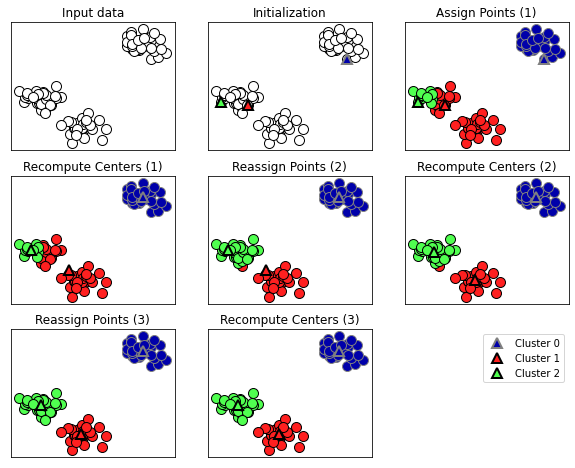

In [ ]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

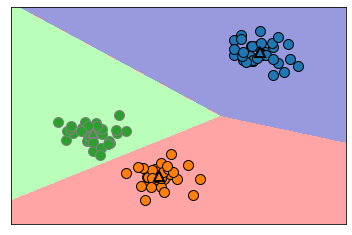

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
Class prediction for [[-1.5, 0.2]]: [1]


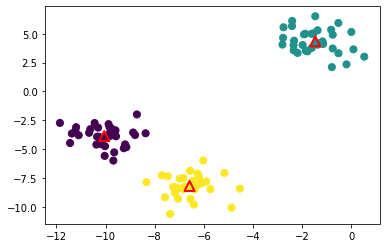

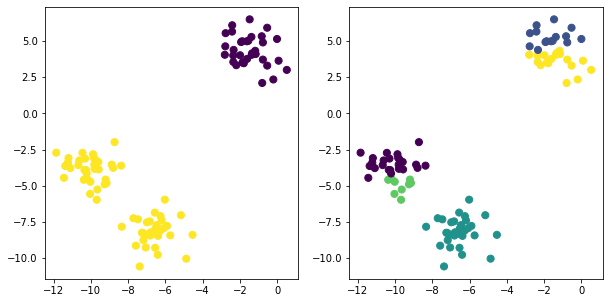

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("Cluster memberships:\n{}".format(kmeans.labels_))

# predict class labels for new data
x_test = [[-1.5, 0.2]]
print('Class prediction for {}:'.format(x_test), kmeans.predict(x_test))

#mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float), marker='o',
            s=50)
# mglearn.discrete_scatter(
# kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
# markers='^', markeredgewidth=2)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c=[0, 1, 2], marker='^', edgecolor='r', linewidth=2, s=100)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
#mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
axes[0].scatter(X[:, 0], X[:, 1], c=assignments.astype(float), marker='o', s=50)
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
#mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
axes[1].scatter(X[:,0], X[:,1], c=assignments.astype(float), marker='o', s=50)
plt.show()

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


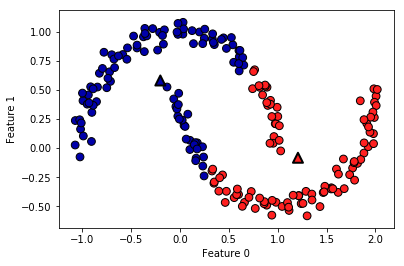

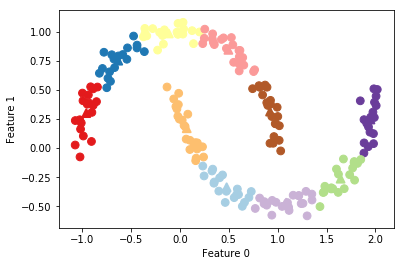

In [ ]:

# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


figure = plt.figure()

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

## Artificial Neural Networks (ANN)


Text(0, 0.5, 'Feature 1')

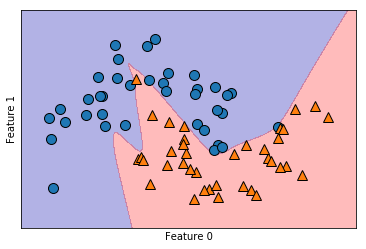

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)
mlp = MLPClassifier(solver='lbfgs', random_state = 0, 
                    hidden_layer_sizes=[10, 10], activation = 'tanh')
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


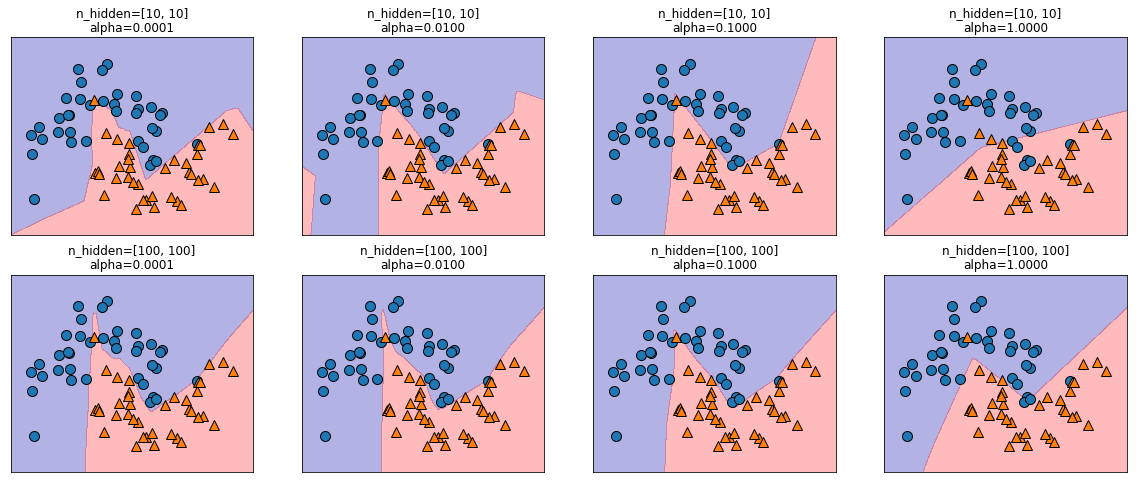

In [ ]:
# Effect of L2 regularization is controlled using the parameter alpha.

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                        alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

Cancer data per-feature maxima: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Accuracy on training set: 0.94
Accuracy on test set: 0.92


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



MLP performance after data rescaling

Accuracy on training set: 0.991
Accuracy on test set: 0.965

MLP performance after introducing regularization

Accuracy on training set: 0.988
Accuracy on test set: 0.972


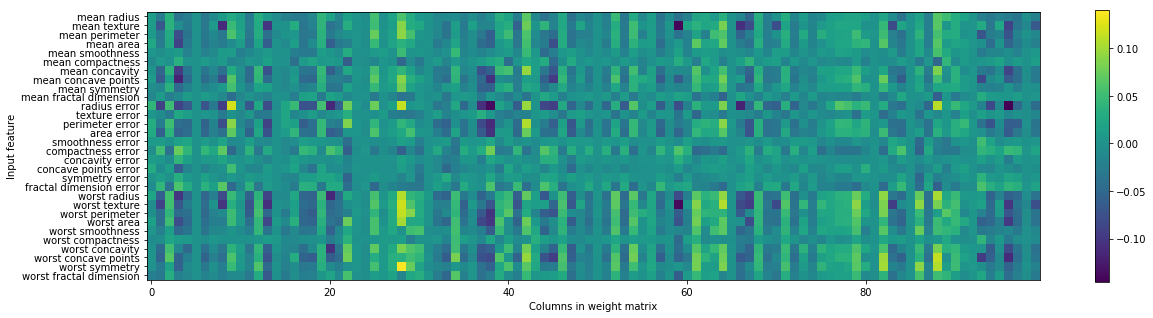

In [ ]:
# Breast Cancer Dataset

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
print("Cancer data per-feature maxima: \n {}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

# Data Pre-processing - normalization
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("\nMLP performance after data rescaling\n")
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

print("\nMLP performance after introducing regularization\n")
# increase the maximum number of iterations
mlp = MLPClassifier(max_iter=1000, alpha = 1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


# Show the values of weights
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

### Exercise 1.5.1

Cancer data per-feature maxima: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

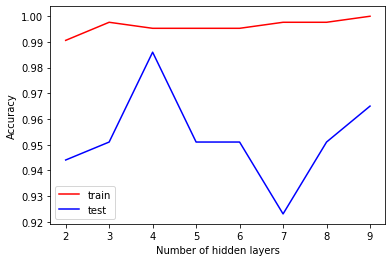

In [ ]:
# Exercise 1.5.1

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset
cancer = load_breast_cancer()

# create train-test splits
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# scale the features
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

train_score = []
test_score = []
for n in range(2, 10, 1):
  layers = [10 for i in range(n)]
  mlp = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=layers, alpha=0.01)
  mlp.fit(X_train_s, y_train)
  train_score.append(mlp.score(X_train_s, y_train))
  test_score.append(mlp.score(X_test_s, y_test))


plt.plot(range(2,10,1), train_score, 'r-', label='train')
plt.plot(range(2,10,1), test_score, 'b-', label='test')
plt.legend(loc='best')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')





## Deep Learning



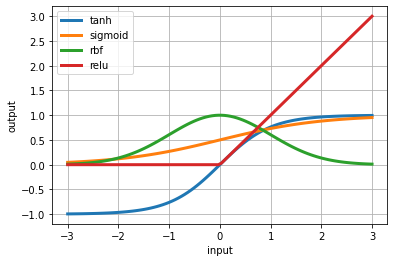

In [ ]:
# Activation Function

import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def rbf(x):
  s = np.exp(-(x*x)/2)
  return s

def relu(x):
  s = [np.maximum(0, a) for a in x]
  return s

x = np.linspace(-3, 3, 100)
y1 = np.tanh(x) 
y2 = sigmoid(x)
y3 = rbf(x)
y4 = relu(x)

plt.plot(x, y1, lw=3, label='tanh')
plt.plot(x, y2, lw=3, label='sigmoid')
plt.plot(x, y3, lw=3, label='rbf')
plt.plot(x, y4, lw=3, label='relu')
plt.grid()
plt.xlabel('input')
plt.ylabel('output')
plt.legend(loc='best')
plt.show()

### Pima Indian Diabetic Dataset

- Use pandas to download CSV file from an URL
- Create a sequential model using Keras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# download the dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')

print(data.info())

print(data.head(5))

print('shape of data', np.shape(data))


# create input-output dataset
X = data.values[:,0:8]     # input
Y = data.values[:,8]       # output


# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
print('Wait for the model to finish training ...')
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
print('done!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0
shape of data (767, 9)
Wait for the model to finish training ...
done!


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


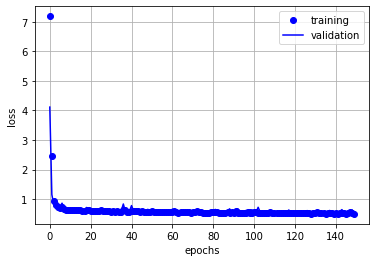

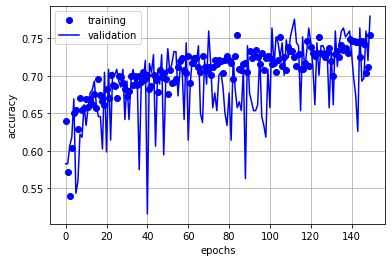

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = np.arange(len(loss))
plt.figure(1)
plt.plot(epochs, loss, 'bo', label='training')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.figure(2)
plt.plot(epochs, acc, 'bo', label='training')
plt.plot(epochs, val_acc, 'b', label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend(loc='best')

## IMDB dataset

It has 25,000 entries in the training set and 25,000 in test set. Only first 10,000 words in the reviews are considered as the input feature vector for each entry.  The output is either a positive review or a negative review. It is a binary classification problem.


Some of the other points to note here are as follows:

* For a binary classification problem, one should use 'binary_crossentropy' as the loss function.
* 'adam' optimizer gives slightly better performance than 'rmsprop'
* since the output can be 0 or 1, it is better to use 'sigmoid' as the activation function for the output layer node. 
* a sigmoid output activation function is used to ensure that the output remains in the range of (0,1)


In this case, you can see a case of overfitting. Some of the ways, you can deal with overfitting are

* Try a simpler architecture - less number of hidden layers and nodes. For instance, try a 4-4-1 network. 
* Get more training data
* Try Weight regularization term 
* Try dropout 




In [ ]:
# Download the IMDB dataset
#--------------------------------------------

import numpy as np
from keras.datasets import imdb

# Load IMDB Review dataset
#----------------------------------------------------
np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

np.load.__defaults__=(None, False, True, 'ASCII')
# #----------------------------------------------------------

# from keras.datasets import imdb
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
#     num_words = 10000)

# Analyze the data
print("train data 0:", train_data[0])
print("train_data shape:", train_data.shape)
print("length of train_data[0]", len(train_data[0]))
print("train label 0:", train_labels[0])


word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key)
                          for (key, value) in word_index.items()])
decoded_review = ' '.join([
    reverse_word_index.get(i-3, '?') for i in train_data[0]
])

print("Decoded Review for train_data[0]:", decoded_review)

# Prepare your data
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print("x_train:", x_train)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("y_train:", y_train)
print("y_test:", y_test)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


train data 0: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_data shape: (25000,)
length of train_dat

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Decoded Review for train_data[0]: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for

In [ ]:
# Create a NN model
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])




# Setting aside a validation set
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


# train the model
print("Training the model ... Wait!")
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=0)
print("training ends ....")

# Evaluate the model on test data
results = model.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")

# Predict the output
print(model.predict(x_test))

Training the model ... Wait!
training ends ....
25000/25000 [==============================] - 2s 70us/step
Loss on test dataset:  0.7176862808513641
Accuracy on test dataset:  0.85356


[[0.01023656]
 [1.        ]
 [0.9655558 ]
 ...
 [0.00642744]
 [0.01547572]
 [0.84087586]]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


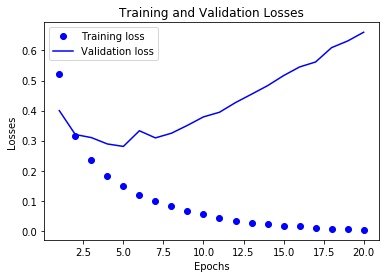

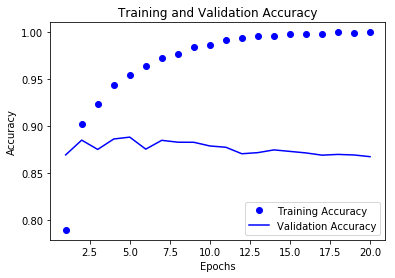

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.figure(1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# try a simpler network

# Create a NN model
from keras import models
from keras import layers


model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])

# train the model
print("Training the model ... Wait!")
history2 = model2.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=0)
print("training ends ....")

# Evaluate the model on test data
results = model2.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")


Training the model ... Wait!
training ends ....
25000/25000 [==============================] - 2s 67us/step
Loss on test dataset:  0.4202020043563843
Accuracy on test dataset:  0.86696




dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


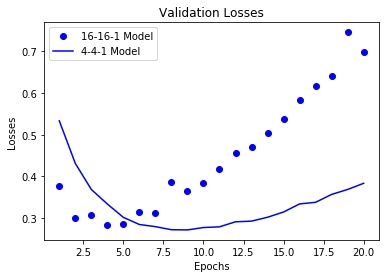

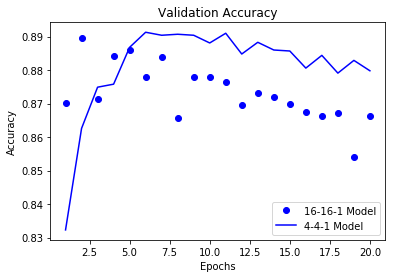

In [ ]:

history_dict2 = history2.history
print(history_dict2.keys())


loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']

epochs = range(1, len(loss_values2)+1)

plt.figure(1)
plt.plot(epochs, val_loss_values, 'bo', label='16-16-1 Model')
plt.plot(epochs, val_loss_values2, 'b', label='4-4-1 Model')
plt.title("Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, val_acc_values, 'bo', label='16-16-1 Model')
plt.plot(epochs, val_acc_values2, 'b', label='4-4-1 Model')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Effect of Weight Regularization

* _Occam's Razor_: Given two explanations for something, the explanation most likely to be correct is the simplest one. 
* A simpler model is one where the distribution of parameter values has less entropy (model with fewer parameters or having less values)
* Weight regularization aims at putting constraint on model complexity by forcing its weights to take small values.


Try these regularizers

- `regularizers.l1(0.001)`
- `regularizers.l1_l2(l1=0.001, l2=0.001)`
- `regularizers.l2(0.0001)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Training is in progress .... Wait!
Training ends ...
25000/25000 [==============================] - 2s 92us/step
Loss on test dataset:  0.511763549451828
Accuracy on test dataset:  0.8646


[[0.24529415]
 [0.9833157 ]
 [0.77662784]
 ...
 [0.10706243]
 [0.09950894]
 [0.29578298]]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


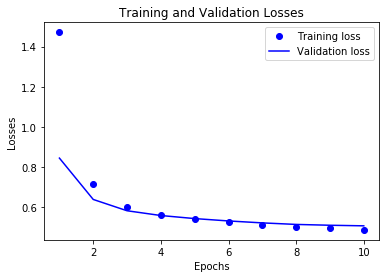

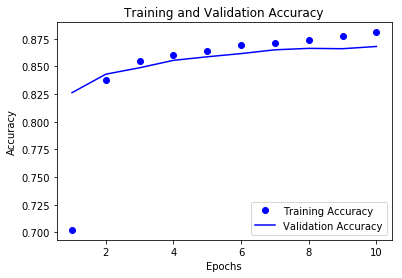

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), 
                      kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(layers.Dense(16, activation='relu', 
          kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model.add(layers.Dense(1, activation='sigmoid', 
                      kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))

model.compile(optimizer='adam', loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()


# train the model
print('Training is in progress .... Wait!')
history = model.fit(partial_x_train, partial_y_train,
                   epochs=10, batch_size=512, 
                   validation_data=(x_val, y_val), verbose=0)
print('Training ends ...')

# Evaluate the model on test data
results = model.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")

# Predict the output
print(model.predict(x_test))


import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.figure(1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



### Effect of Dropout

- invented by Geoff Hinton at UoT
- Dropout, applied to a layer, consists of randomly _dropping out_ (setting to zero) a number of output features of the layer during training. 
- The _dropout rate_ is the fraction of features that are zeroed out. It's usually set between 0.2 and 0.5
- At test time, no units are dropped out; instead, the layer's output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.


In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])

# train the model
print("Training the model ... Wait!")
history3 = model3.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, 
                   validation_data=(x_val, y_val),
                   verbose=0)
print("training ends ....")

# Evaluate the model on test data
results = model3.evaluate(x_test, y_test)
print("Loss on test dataset: ", results[0])
print("Accuracy on test dataset: ", results[1])
print("\n")

Training the model ... Wait!
training ends ....
25000/25000 [==============================] - 2s 67us/step
Loss on test dataset:  0.5993143529856205
Accuracy on test dataset:  0.8742




dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


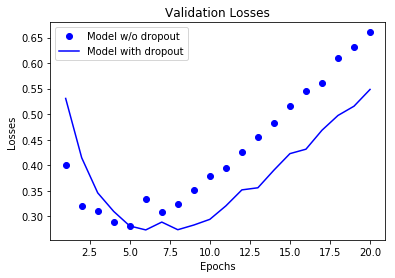

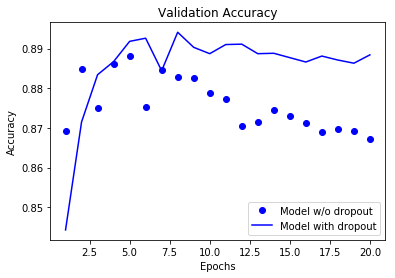

In [ ]:
history_dict3= history3.history
print(history_dict3.keys())


loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']
acc_values3 = history_dict3['acc']
val_acc_values3 = history_dict3['val_acc']

epochs = range(1, len(loss_values3)+1)

plt.figure(1)
plt.plot(epochs, val_loss_values, 'bo', label='Model w/o dropout')
plt.plot(epochs, val_loss_values3, 'b', label='Model with dropout')
plt.title("Validation Losses")
plt.xlabel("Epochs")
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs, val_acc_values, 'bo', label='Model w/o dropout')
plt.plot(epochs, val_acc_values3, 'b', label='Model with dropout')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Reuter dataset


We only use the first 10,000 words as input and classify this input text into 46 different topics. So, it is a **multi-class** classification problem. 

* We need to understand "categorical encoding" or "one-hot encoding"
* 'softmax' provides probability distribution over 46 output classes. 
* In this case, it is better to use 'categorical_crossentropy' as the loss function.
* information blockage reduces the network performance. Number of neurons in a hidden layer should be greater than the number of output. 


In [ ]:
from keras.datasets import reuters
import numpy as np

# Load Reuter Review dataset

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old
# #-------------------------------



In [ ]:
# Run the previous Cell before executing this one
# Analyze the data

print("shape of train_data:", np.shape(train_data))
print("shape of test_data:", test_data.shape)
print("train_data[10]:", train_data[10])
print("train_labels[10]:", train_labels[10])


word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in 
                             train_data[10]])
print("Decoded Text:", decoded_newswire)


# Prepare the data 
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):  
    results[i, sequence] = 1.  
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print("shape of one_hot_train_labels:", one_hot_train_labels.shape)
print("shape of one_hot_test_labels:", one_hot_test_labels.shape)

shape of train_data: (8982,)
shape of test_data: (2246,)
train_data[10]: [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
train_labels[10]: 3
Decoded Text: ? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3
shape of one_hot_train_labels: (8982, 46)
shape of one_hot_test_labels: (2246, 46)


Training in progress ... Wait!
Training ends here ..
2246/2246 [==============================] - 0s 128us/step
Evaluation results on test data (loss, accuracy): [1.2064472032463773, 0.784951024095819]


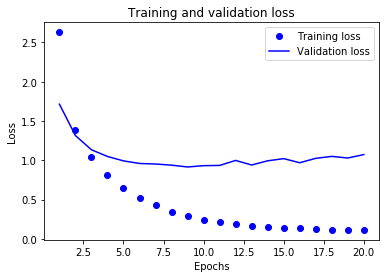

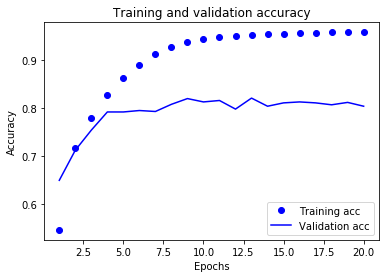

In [ ]:
# run the previous cell before executing this cell.

# Build the model
from keras import models
from keras import layers

# You can change the dimension of second layer to 4 to see the effect
# of information blockage
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

# set aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train =  one_hot_train_labels[1000:]

# train the model
print("Training in progress ... Wait!")
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val),
                   verbose=0)
print("Training ends here ..")


# Evaluate the model
results = model.evaluate(x_test, one_hot_test_labels)
print("Evaluation results on test data (loss, accuracy):", results)


import matplotlib.pyplot as plt
plt.figure(1)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




## Regression with Keras

### Boston Housing dataset

* Here we demonstrate the use of k-fold validation for a regression task. 

* k-fold validation is carried out when there is a very small dataset available for training.

* mean squared error (MSE) is used as a loss function for regression.

* Evaluation metrics used for regression is different from those used for classification.

* When input data have values in different range, it is a good practice to scale or normalize them appropriately. 




In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("train_data shape:", train_data.shape)
print("train_data shape:", test_data.shape)
#print("train_targets:", train_targets)
print("train_targets shape:", train_targets.shape)


# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


# Build your network
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                        input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  
  return model



# K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
  [train_data[:i*num_val_samples], 
  train_data[(i+1)*num_val_samples:]], axis = 0)
  
  partial_train_targets = np.concatenate(
  [train_targets[:i*num_val_samples],
  train_targets[(i+1)*num_val_samples:]], axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, 
            epochs = num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)
  mae_history = history.history['mean_absolute_error']
  all_mae_histories.append(mae_history)
  

57344/57026 [==============================] - 0s 1us/step
train_data shape: (404, 13)
train_data shape: (102, 13)
train_targets shape: (404,)
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


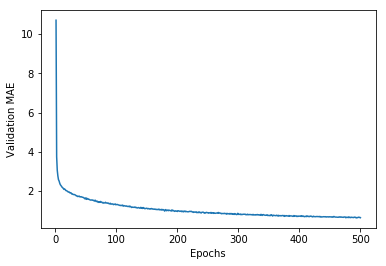

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

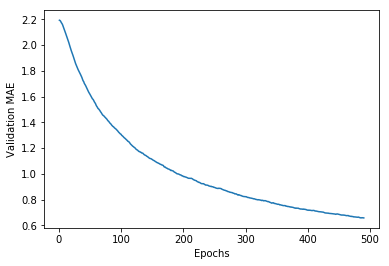

In [ ]:
def smooth_curve(points, factor=0.9): 
  smoothed_points = [] 
  for point in points: 
    if smoothed_points: 
      previous = smoothed_points[-1] 
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else: 
      smoothed_points.append(point) 
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Convolution Neural Networks / ConvNets




### MNIST handwritten digit recognition dataset + MLP (FC) network

- The problem is to classify grayscale images of handwritten digits (28x28 pixels) into 10 categories (0 through 9).
- It has 60,000 training images and 10,000 test images
- First we will try a 2 layer FC (dense) neural network which gives around 97.8% accuracy on the test set. 


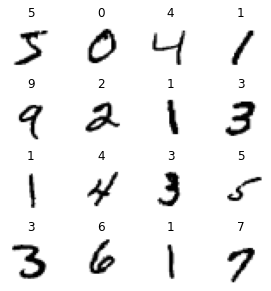

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

n_rows = 4
n_cols = 4
cnt = 0
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[cnt], cmap=plt.cm.binary)
        plt.axis('off')
        plt.title(train_labels[index], fontsize=12)
        cnt += 1
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# load the dataset
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# Analyze the dataset
print("train images shape:", train_images.shape)
print("test images shape:", test_images.shape)
print("train_labels:", train_labels)
print("length of train labels:", len(train_labels))
print("length of test labels:", len(test_labels))
print("test_labels:", test_labels)
print("train image datatype:", train_images.dtype)

# import matplotlib.pyplot as plt
# digit = train_images[4]
# plt.imshow(digit, cmap=plt.cm.binary)
# plt.show()


from keras import models
from keras import layers

# Build the model
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam', loss = 'categorical_crossentropy',
               metrics=['accuracy'])

# prepare the dataset
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# train the network
network.fit(train_images, train_labels, epochs=5, batch_size = 128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

train images shape: (60000, 28, 28)
test images shape: (10000, 28, 28)
train_labels: [5 0 4 ... 5 6 8]
length of train labels: 60000
length of test labels: 10000
test_labels: [7 2 1 ... 4 5 6]
train image datatype: uint8
Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4638 - accuracy: 0.8681
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1184 - accuracy: 0.9656
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0712 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0491 - accuracy: 0.9857
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9777
Test Accuracy: 0.9776999950408936


### MNIST Fashion Dataset  Classification using ConvNet


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# check shapes of input/output data
print('Shape of X_train_full:', np.shape(X_train_full))
print('Shape of y_train_full:', np.shape(y_train_full))
print('Shape of X_test:', np.shape(X_test))
print('Shape of y_test:', np.shape(y_test))

# scale the pixel intensities to [0, 1]
# also create a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


# create class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Shape of X_train_full: (60000, 28, 28)
Shape of y_train_full: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


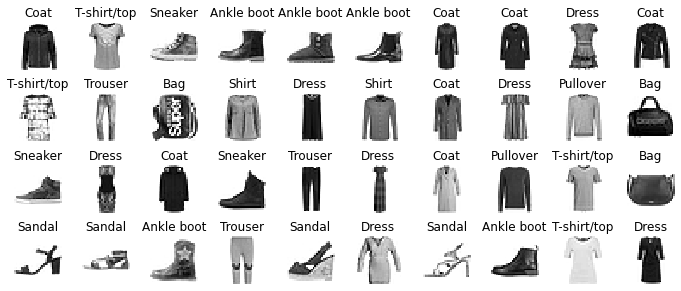

In [ ]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
# create a sequential model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Accessing layers, weights etc.
for layer in model.layers:
  print(layer.name)
  print('Shape of layer Wts:', np.shape(layer.get_weights()))

h1_wt = model.layers[1].get_weights()[0]
h1_bi = model.layers[1].get_weights()[1]
h2_wt = model.layers[2].get_weights()[0]
h2_bi = model.layers[2].get_weights()[1]
h3_wt = model.layers[3].get_weights()[0]
h3_bi = model.layers[3].get_weights()[1]

print('Shape of Hidden 1 parameters:', np.shape(h1_wt), np.shape(h1_bi))
print('Shape of Hidden 2 parameters:', np.shape(h2_wt), np.shape(h2_bi))
print('Shape of Hidden 1 parameters:', np.shape(h3_wt), np.shape(h3_bi))



flatten_1
Shape of layer Wts: (0,)
dense_3
Shape of layer Wts: (2,)
dense_4
Shape of layer Wts: (2,)
dense_5
Shape of layer Wts: (2,)
Shape of Hidden 1 parameters: (784, 300) (300,)
Shape of Hidden 2 parameters: (300, 100) (100,)
Shape of Hidden 1 parameters: (100, 10) (10,)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# training
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 0.9984 - accuracy: 0.6876 - val_loss: 0.5373 - val_accuracy: 0.8190
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5054 - accuracy: 0.8234 - val_loss: 0.4525 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4541 - accuracy: 0.8429 - val_loss: 0.4263 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4251 - accuracy: 0.8507 - val_loss: 0.4109 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4063 - accuracy: 0.8571 - val_loss: 0.3843 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3862 - accuracy: 0.8629 - val_loss: 0.4059 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8682 - val_loss: 0.3683 - val_accuracy:

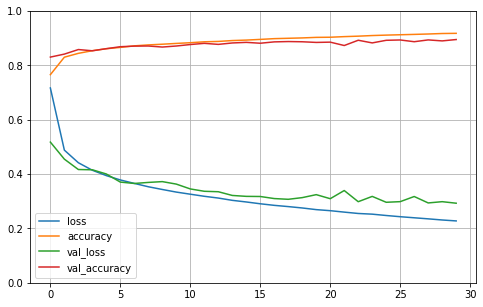

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# testing
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 65.9436 - accuracy: 0.8410


[65.94364929199219, 0.8410000205039978]

In [ ]:
# predict
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = model.predict_classes(X_new)
print('Predicted classes:', y_pred)
print('Predict class names:', np.array(class_names)[y_pred])
print('Actual Classes:', y_test[:3])

Predicted classes: [9 2 1]
Predict class names: ['Ankle boot' 'Pullover' 'Trouser']
Actual Classes: [9 2 1]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### MNIST Digit Recognition using a ConvNet
- Here we will try a convnet for the above multi-label classification problem. 
- It gives an accuracy of 99.1% which is significantly higher than the previous network. 

The key characteristics of ConvNets are:
- The pattern learnt by convnets are translation invariant.
- They can learn spatial hierarchies of patterns
- Convolutions operate over 3D tensors (feature maps): Width x height x depth (or channels)
- output depth of a conv layer refers to the number of filters being applied. 
- Convolution filter has two key parameters: filter size (3x3) and filter depth (32)
- output feature map size depends on filter _size_ and _strides_
- _padding_ can be used to obtain same spatial dimension for output feature map.





In [ ]:
# load the dataset
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Prepare / process the dataset
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# build a ConvNet Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

# train the network
model.fit(train_images, train_labels, epochs=5, batch_size=64)

#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test Accuracy: ", test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                36928     
__________

## Deep Learning Projects

### CIFAR 10 dataset

- This is discussed in detail at [this](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/) link.

- We show the effect of dropout and data augmentation on the model performance.
- You can get about 87% accuracy with this model.

170500096/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


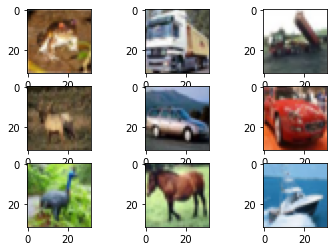

In [1]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10

# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [8]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

Model 1: Baseline ConvNet model
- 2 Conv layers + 1 pooling layer + 2 FC layers
- Provides an accuracy of only 67%

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from keras.optimizers import SGD

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))  # 
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Model 2: ConvNet model with Dropout
- 6 Conv Layers + 3 Pooling layers + 2 FC layers
- Provides accuracy of about 82% with dropout

In [4]:
from keras.layers import Dropout
# define cnn model: Regularization by dropout
def define_model2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Baseline ConvNet model 
- 6 CONV layers + 3 Pooling layers + 2 FC layers

In [14]:
# define cnn model
def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [5]:
from matplotlib import pyplot
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [6]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
  # model = define_model1()
	model = define_model2()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Epoch 1/100
782/782 [==============================] - 39s 8ms/step - loss: 2.2041 - accuracy: 0.1845 - val_loss: 1.7374 - val_accuracy: 0.3874
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 1.7317 - accuracy: 0.3635 - val_loss: 1.5400 - val_accuracy: 0.4377
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 1.5484 - accuracy: 0.4309 - val_loss: 1.3938 - val_accuracy: 0.4961
Epoch 4/100
782/782 [==============================] - 6s 8ms/step - loss: 1.4556 - accuracy: 0.4704 - val_loss: 1.3058 - val_accuracy: 0.5347
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 1.3642 - accuracy: 0.5049 - val_loss: 1.3163 - val_accuracy: 0.5285
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 1.2941 - accuracy: 0.5285 - val_loss: 1.1919 - val_accuracy: 0.5732
Epoch 7/100
782/782 [==============================] - 6s 8ms/step - loss: 1.2279 - accuracy: 0.5549 - val_loss: 1.0935 - val_accuracy: 0.608

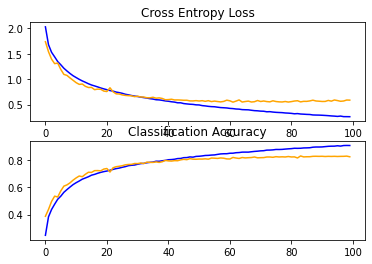

In [9]:
run_test_harness()

Effect of Data Augmentation on Classification performance
- Model Accuracy improves to 87% with data augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator
# supports data augmentation
def run_test_harness2():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model3()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

In [ ]:
run_test_harness2()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


### Cats-Vs-Dog Classification

- The dataset contains 25,000 color images of size 200x200 pixels containing a picture of a dog or a cat.
- Look at this [link](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=RXZT2UsyIVe_) for more details.

- Download a subset of this dataset containing 2000 images.
- Extract the files inside `/tmp/` folder


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

Plot few images from the dataset

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Create a ConvNet model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Data Processing - Apply data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Train the model

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Analyze the model performance during training and testing phase

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Visualize what the network has learnt

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

clean up

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

## Text Processing with deep Learning



In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

print(token_index)

max_length = 10

results = np.zeros(shape = (len(samples), max_length,
                           max(token_index.values())+1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1

print(results)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [ ]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'the dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('shape of one_hot_results:', np.shape(one_hot_results))

Found 9 unique tokens.
shape of one_hot_results: (2, 1000)


In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20


#--------------------------------------------
import numpy as np
from keras.datasets import imdb

# Load IMDB Review dataset

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features)

# restore np.load for future normal usage
np.load = np_load_old
# #-------------------------------




#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


print('shape of x_train:', shape(x_train))
print('shape of x_test:', shape(x_test))

TypeError: ignored